# **<h3 align="center">Machine Learning - Project</h3>**
## **<h3 align="center">Group 30 - Project</h3>**

**Group members:**<br>Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Gonçalo Peres - 20211625@novaims.unl.pt - 20211625<br>
Leonor Mira - 20240658@novaims.unl.pt - 20240658<br>
Miguel Natário - 20240498@novaims.unl.pt - 20240498<br>
Nuno Bernardino  - 2021546@novaims.unl.pt - 2021546<br>

## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Import the Datasets](#chapter2)
* [3. Explore the Dataset ](#chapter3)
    * [Basic Statistics](#section_3_1)  #this need to be changed
    * [Inconsistencies](#section_3_2) 
    * [Visualization](#section_3_3)  
* [4. Preprocessing the Data](#chapter4)
    * [Missing Values](#section_4_1)  
    * [Outliers](#section_4_2) #boxplots for ex
    * [Categorical](#section_4_3)  #encoding por ex
* [5. Feature Engineering](#chapter5)
* [6. Feature Selection](#chapter6)
    * [Scaling the Data](#section_6_1)  
    * [Numerical Features](#section_6_2) 
    * [Categorical Features](#section_6_3) 
    * [Final Features](#section_6_3)
* [7. Modeling](#chapter7) 

# 1. Import the Libraries<a class="anchor" id="chapter1"></a>

In [2]:
#importing standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# 2. Import the Datasets <a class="anchor" id="chapter2"></a>
Before importing the datasets, we need to unzip the data file.

In [3]:
zip_path = r'../Data.zip'  # Adjust based on actual location
extract_to_path = '../project_data'

# Extract files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction complete.")

Extraction complete.


In the following cell we will import the datasets and set Claim Identifier as our index.

In [4]:
df_train = pd.read_csv('../project_data/Data/train_data.csv', index_col='Claim Identifier')
df_test = pd.read_csv('../project_data/Data/test_data.csv',index_col='Claim Identifier')

/var/folders/cp/shkc8h6s1799vvv46wpc8v3h0000gn/T/ipykernel_3418/3257207922.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../project_data/Data/train_data.csv', index_col='Claim Identifier')


To check that the imports really worked, we will use .head().

In [167]:
df_train.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0


In [168]:
df_test.head(2)


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1


## 3. Explore the Dataset <a class="anchor" id="chapter3"></a>
In this chapter we will perform the basic steps to get to know our dataset.

## 3.1. Basic Statistics <a class="anchor" id="section_3_1"></a>

The <span style='color:Blue'> info()  </span> method prints information about the dataframe.

In [169]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type


***Some conclusions from the output above**: 
- some datatypes need to be changed, such as:
    - 'Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date' can be datetime;
    - 'Industry Code', 'Zip Code', 'WCIO Part Of Body Code', 'WCIO Cause of Injury Code ', 'WCIO Nature of Injury Code' are integers instead of float  --> since we have some missing valyes we will do it after treating them
    - same with 'Birth Year', and 'Age at Injury' --> since we have some missing valyes we will do it after treating them
- we have some missing values (this will be treated in 4.1.Missing values);
- we can also see that  'OIICS Nature of Injury Description' has only missing values, for this motive, we can already delete from our dataset;


In [170]:
#Converting Date Columns
# Convert columns to datetime format
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
for col in date_columns:
    df_train[col] = pd.to_datetime(df_train[col], errors='coerce')
    #Do the same for test
    df_test[col] = pd.to_datetime(df_test[col], errors='coerce')

In [171]:
# # Convert columns to integer format (instead of float), using nullable integer type to handle NaNs
# int_columns = ['Industry Code', 'Zip Code', 'WCIO Part Of Body Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'Birth Year', 'Age at Injury']
# for col in int_columns:
#     df_train[col] = pd.to_numeric(df_train[col], errors='coerce').astype('Int64')


In [172]:
# Drop the column with only missing values
df_train.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

# Do the same for test
df_test.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

In [173]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593471 entries, 5393875 to 818961390
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570337 non-null  datetime64[ns]
 1   Age at Injury                      574026 non-null  float64       
 2   Alternative Dispute Resolution     574026 non-null  object        
 3   Assembly Date                      593471 non-null  datetime64[ns]
 4   Attorney/Representative            574026 non-null  object        
 5   Average Weekly Wage                545375 non-null  float64       
 6   Birth Year                         544948 non-null  float64       
 7   C-2 Date                           559466 non-null  datetime64[ns]
 8   C-3 Date                           187245 non-null  datetime64[ns]
 9   Carrier Name                       574026 non-null  object        
 10  Carrier Typ

In [174]:
# # # Convert object columns to category
# categorical_columns = ['Alternative Dispute Resolution', 'Carrier Name', 'Carrier Type', 
#                        'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
#                        'District Name', 'Gender', 'WCB Decision', 'Medical Fee Region']

# df_train[categorical_columns] = df_train[categorical_columns].astype('category')

In [175]:
# Example: Convert numerical columns stored as objects to float (if necessary)
# df_train['Average Weekly Wage'] = pd.to_numeric(df_train['Average Weekly Wage'], errors='coerce')

The <span style='color:Blue'> describe()  </span> method  is used for calculating some statistical data.

In [176]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,42.114270,14.256432,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,491.088321,6092.918120,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1886.767604,414.644423,0.0,1965.0,1977.0,1989.0,2018.0
IME-4 Count,132803.0,3.207337,2.832303,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,58.645305,19.644175,11.0,45.0,61.0,71.0,92.0
WCIO Cause of Injury Code,558386.0,54.381143,25.874281,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,41.013839,22.207521,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,39.738146,22.365940,-9.0,33.0,38.0,53.0,99.0
Agreement Reached,574026.0,0.046665,0.210921,0.0,0.0,0.0,0.0,1.0
Number of Dependents,574026.0,3.006559,2.000801,0.0,1.0,3.0,5.0,6.0


By the output above we can see a strange value of min in 'WCIO Part Of Body Code'  feature, the -9. Let's dive into this:

In [177]:
# Since the code has a Description, we want to check what is the correspondent 'WCIO Part Of Body Description'.
df_train[df_train['WCIO Part Of Body Code'] == -9.0]['WCIO Part Of Body Description'].value_counts()

MULTIPLE    42011
Name: WCIO Part Of Body Description, dtype: int64

In [178]:
#Check if Multiple is associated with other different code
df_train[df_train['WCIO Part Of Body Description'] == 'MULTIPLE']['WCIO Part Of Body Code'].value_counts()

-9.0    42011
Name: WCIO Part Of Body Code, dtype: int64

We noticed a negative value in the WCIO Part Of Body Code and confirmed that it is not a valid code! Since all -9 values correspond to "Multiple" in the description, we believe this could still be important, even though it doesn't appear in the reference tables. Therefore, we will assign a new code— 101 —and change the description from "Multiple" to "Nonclassifiable.

In [179]:
# Atribuir 101 a todas as ocorrências do código negativo e alterar a descrição para 'Nonclassifiable'
df_train.loc[df_train['WCIO Part Of Body Code'] < 0, 'WCIO Part Of Body Code'] = 101
df_train.loc[df_train['WCIO Part Of Body Code'] == 101, 'WCIO Part Of Body Description'] = 'Nonclassifiable'

#Do the same for the test
df_test.loc[df_test['WCIO Part Of Body Code'] < 0, 'WCIO Part Of Body Code'] = 101
df_test.loc[df_test['WCIO Part Of Body Code'] == 101, 'WCIO Part Of Body Description'] = 'Nonclassifiable'

In [180]:
df_train.describe(include=['O']).T

,count,unique,top,freq
Alternative Dispute Resolution,574026,3,N,571412
Attorney/Representative,574026,2,N,392291
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430
COVID-19 Indicator,574026,2,N,546505
District Name,574026,8,NYC,270779
Gender,574026,4,M,335218
Industry Code Description,564068,20,HEALTH CARE AND SOCIAL ASSISTANCE,114339


Using the `describe` method for object-type features, we noticed that we can remove numeric values from 'Claim Injury Type' and 'Carrier Type'. Additionally, we identified some features that appear to be binary, which could be converted from text to binary format. We also observed that 'WCB Decision' contains only a single unique value, which warrants further investigation.

In [181]:
df_train['WCB Decision'].value_counts()

Not Work Related    574026
Name: WCB Decision, dtype: int64

In [182]:
df_train['WCB Decision'].isnull().sum()

19445

Since it only has one value, we decided to delete this column for further analysis.

In [183]:
df_train = df_train.drop(['WCB Decision'], axis=1)

Now let's clean the text variables.

In [184]:
df_train['Carrier Type'].value_counts()

1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: Carrier Type, dtype: int64

In [185]:
df_train['Claim Injury Type'].value_counts()

2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: Claim Injury Type, dtype: int64

In [186]:
# Remover o número e o primeiro ponto da coluna 'Carrier Type' em df_train
df_train['Carrier Type'] = df_train['Carrier Type'].str.split('.', n=1).str[1].str.strip()

# Remover o número e o primeiro ponto da coluna 'Claim Injury Type' em df_train
df_train['Claim Injury Type'] = df_train['Claim Injury Type'].str.split('.', n=1).str[1].str.strip()

#Apply to the test set 
df_test['Carrier Type'] = df_test['Carrier Type'].str.split('.', n=1).str[1].str.strip()
# df_test['Claim Injury Type'] = df_test['Claim Injury Type'].str.split('.', n=1).str[1].str.strip()


Let's check for the binary ones.

In [187]:
df_train['Alternative Dispute Resolution'].value_counts()

N    571412
Y      2609
U         5
Name: Alternative Dispute Resolution, dtype: int64

Since there are only 5 rows where `Alternative Dispute Resolution` is 'U', we have two options: either delete these rows or assign 'NaN' to these values. In this case, we'll delete the rows where `Alternative Dispute Resolution` is 'U'.

In [188]:
# Delete rows where 'Alternative Dispute Resolution' is 'U'
df_train = df_train[df_train['Alternative Dispute Resolution'] != 'U']

In [189]:
df_train['Attorney/Representative'].value_counts()

N    392287
Y    181734
Name: Attorney/Representative, dtype: int64

In [190]:
df_train['COVID-19 Indicator'].value_counts()

N    546500
Y     27521
Name: COVID-19 Indicator, dtype: int64

In [191]:
# Convert 'N' to 0 and 'Y' to 1 for binary columns
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator','Alternative Dispute Resolution']
for col in binary_columns:
    df_train[col] = df_train[col].map({'N': 0, 'Y': 1})
    df_test[col] = df_test[col].map({'N': 0, 'Y': 1})


The <span style='color:Blue'> var()  </span> method allows us to check if there are any of the numerical variables are univariate (variance is equal to 0). 

In [192]:
# Selecionar apenas as colunas numéricas
numerical_cols = df_train.select_dtypes(include=['number'])

# Calcular a variância apenas nas colunas numéricas
numerical_cols.var()

Age at Injury                     2.032461e+02
Alternative Dispute Resolution    4.524480e-03
Attorney/Representative           2.163641e-01
Average Weekly Wage               3.712392e+07
Birth Year                        1.719315e+05
COVID-19 Indicator                4.564567e-02
IME-4 Count                       8.021966e+00
Industry Code                     3.858920e+02
WCIO Cause of Injury Code         6.694784e+02
WCIO Nature of Injury Code        4.931740e+02
WCIO Part Of Body Code            5.353025e+02
Agreement Reached                 4.448794e-02
Number of Dependents              4.003189e+00
dtype: float64

Vamos eliminar linhas nao uteis pq nao tem o mais importante (target)

In [193]:
# Drop rows where the target variable is NaN
df_train = df_train.dropna(subset=['Claim Injury Type'])

## 3.2. Inconsistencies <a class="anchor" id="section_3_2"></a>
In this section, we will identify and address inconsistencies to enhance the data preprocessing phase.

In [194]:
df= df_train.copy()

### 3.2.1. Non null Target
Since Claim Injury Type is our target, we need to make sure that we don't have missing values on this variable.

In [195]:
df['Claim Injury Type'].isna().sum()

0

In [196]:
# Drop rows where the target variable is NaN
df = df.dropna(subset=['Claim Injury Type'])

### 3.2.2. Checking Combinations of Code and Description
We need to verify that each Code corresponds uniquely to its respective Description. We'll count the number of unique combinations and compare it to the individual counts.<br>
For that we create a function, that takes the DataFrame, code column, and description column as inputs, and prints the number of unique combinations, the total count of codes, and the total count of descriptions. It also checks if the total counts match the number of unique combinations.

In [197]:
def check_code_description_combinations(df, code_column, description_column):
    # Count the number of unique combinations of Code and Description
    unique_combinations = df[[code_column, description_column]].drop_duplicates()
    print(f"Number of unique combinations of {code_column} and {description_column}: {unique_combinations.shape[0]}")

    # Count the total occurrences of Code and Description individually
    code_count_sum = df[code_column].nunique()
    description_count_sum = df[description_column].nunique()

    print(f"Total count of {code_column}: {code_count_sum}")
    print(f"Total count of {description_column}: {description_count_sum}")

    # Check if the total counts are equal to the number of unique combinations
    if code_count_sum == description_count_sum == unique_combinations.shape[0]:
        print(f"The number of unique combinations matches the total counts of {code_column} and {description_column}.")
    else:
        print(f"There is a discrepancy between the number of unique combinations and the total counts of {code_column} and {description_column}.")

> #### Cause of Injury Code and  Description

In [198]:
# Call the function for different Code and Description columns
check_code_description_combinations(df, 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description')

Number of unique combinations of WCIO Cause of Injury Code and WCIO Cause of Injury Description: 78
Total count of WCIO Cause of Injury Code: 77
Total count of WCIO Cause of Injury Description: 74
There is a discrepancy between the number of unique combinations and the total counts of WCIO Cause of Injury Code and WCIO Cause of Injury Description.


One of the unique combinations includes cases where both `Code` and `Description` are `NaN`, which counts as a valid combination. This explains why there might be one more unique combination compared to the total count of `Injury Code`. However, we also observe that the same description might be linked to multiple codes, which suggests some inconsistencies. Let's explore these cases further to understand the discrepancies.

In [199]:
for description, group in df.groupby('WCIO Cause of Injury Description'):
    unique_codes = group['WCIO Cause of Injury Code'].nunique()
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates())

Description 'OBJECT BEING LIFTED OR HANDLED' is linked to 3 different codes.


                  WCIO Cause of Injury Code WCIO Cause of Injury Description
Claim Identifier                                                            
5393889                                79.0   OBJECT BEING LIFTED OR HANDLED
5393948                                17.0   OBJECT BEING LIFTED OR HANDLED
5393880                                66.0   OBJECT BEING LIFTED OR HANDLED
Description 'REPETITIVE MOTION' is linked to 2 different codes.


                  WCIO Cause of Injury Code WCIO Cause of Injury Description
Claim Identifier                                                            
5393091                                97.0                REPETITIVE MOTION
5398012                                94.0                REPETITIVE MOTION


The descriptions 'REPETITIVE MOTION' and 'OBJECT BEING LIFTED OR HANDLED' are assigned to different codes. After reviewing the original reference table, we found that this is correct. The original table provides more details, and each code corresponds to different parts of the body, explaining the variations. <br>
Let's do the same for the others Code and Description.

> #### Nature of Injury Code and  Description

In [200]:
check_code_description_combinations(df, 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description')


Number of unique combinations of WCIO Nature of Injury Code and WCIO Nature of Injury Description: 57
Total count of WCIO Nature of Injury Code: 56
Total count of WCIO Nature of Injury Description: 56
There is a discrepancy between the number of unique combinations and the total counts of WCIO Nature of Injury Code and WCIO Nature of Injury Description.


In [201]:
for description, group in df.groupby('WCIO Nature of Injury Description'):
    unique_codes = group['WCIO Nature of Injury Code'].nunique()
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates())

This isnt printing because its only NaN.

> #### Part Of Body Code and  Description

In [202]:
check_code_description_combinations(df_train, 'WCIO Part Of Body Code', 'WCIO Part Of Body Description')

Number of unique combinations of WCIO Part Of Body Code and WCIO Part Of Body Description: 58
Total count of WCIO Part Of Body Code: 57
Total count of WCIO Part Of Body Description: 54
There is a discrepancy between the number of unique combinations and the total counts of WCIO Part Of Body Code and WCIO Part Of Body Description.


In [203]:
for description, group in df.groupby('WCIO Part Of Body Description'):
    unique_codes = group['WCIO Part Of Body Code'].nunique()
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates())

Description 'DISC' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393781                             43.0                          DISC
5394136                             22.0                          DISC
Description 'SOFT TISSUE' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393980                             18.0                   SOFT TISSUE
5394179                             25.0                   SOFT TISSUE
Description 'SPINAL CORD' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393898                             23.0                   SPINAL CORD
5397921                             47.0      

The descriptions 'DISC','SOFT TISSUE' and 'SPINAL CORD' are assigned to different codes. After reviewing the original reference table, we found that this is correct. The original table provides more details, and each code corresponds to different parts of the body, explaining the variations. <br>
This is also a reason to avoid using the description features. Note that this decision can be reconsidered for the second handout.

In [204]:
df = df.drop(['WCIO Cause of Injury Description','WCIO Nature of Injury Description', 'WCIO Part Of Body Description','Industry Code Description'], axis=1)

### 3.2.4.  Handling Average Weekly Wage Inconsistencies

The 'Average Weekly Wage' cannot be negative.

In [205]:
# 1.2 Average Weekly Wage: Check for negative or extremely high wages
wage_neg = df[df['Average Weekly Wage'] < 0]

print(f"Number of negative wages: {wage_neg.shape[0]}")

Number of negative wages: 0


We can also check if there are values equal to 0, also that does not makes sense.

In [206]:
wage_null = df[df['Average Weekly Wage'] == 0]

print(f"Number of zero wages: {wage_null.shape[0]}")

Number of zero wages: 335446


It is not logical for the Average Weekly Wage to be zero, given that the dataset relates to job insurances. 

### 3.2.5. Handling Birth Year Inconsistencies
The Birth Year should be realistic, meaning it should not be before 1900 or too far into the future. Additionally, entries with a birth year of 0 will be considered missing values, as a person must have a birth year.

In [207]:
# Replace 0 values in 'Birth Year' with NaN using np.where
df['Birth Year'] = np.where(df['Birth Year'] == 0, np.nan, df['Birth Year'])

In [208]:
# Identify unrealistic Birth Year entries (e.g., before 1940 or after 2006)
birth_year= df[(df['Birth Year'] < 1940) | (df['Birth Year'] > 2006)]
print(f"Number of unrealistic birth years: {birth_year.shape[0]}")

Number of unrealistic birth years: 874


In [209]:
# Drop birth year outliers from the dataset
df = df.drop(birth_year.index)

### 3.2.6. Age at Injury vs. Birth Year
We need to ensure that the Age at Injury is consistent with the Birth Year and the Accident Date. We'll use the Accident Date to verify consistency where possible.

In [210]:
# Extract Accident Year from Accident Date
df['Accident Year'] = pd.to_datetime(df['Accident Date'], errors='coerce').dt.year

# Identify discrepancies between calculated age and given Age at Injury
age_discrepancies = df[(df['Birth Year'].notnull()) & (df['Accident Year'].notnull()) & 
                       ((df['Accident Year'] - df['Birth Year']) != df['Age at Injury'])]
print(f"Number of age discrepancies: {age_discrepancies.shape[0]}")

Number of age discrepancies: 242959


In [211]:
# Calculate the percentage of rows with age discrepancies
percentage_discrepancies = (age_discrepancies.shape[0] / df.shape[0]) * 100

print(f"Percentage of age discrepancies: {percentage_discrepancies:.2f}%")

Percentage of age discrepancies: 42.39%


Since the discrepancies represent more than 40% of the dataset, we will assume that the Age at Injury is incorrect rather than Birth Year or Accident Year. To correct this, we will calculate Age at Injury as the difference between Accident Year and Birth Year. Since we only have the year, we will assume the age at the end of the year.

In [212]:
# Calculate 'Age at Injury' by finding the difference between 'Accident Year' and 'Birth Year'
df['Age at Injury'] = df['Accident Year'] - df['Birth Year']

In [213]:
df['Age at Injury'].value_counts()

32.0    12964
31.0    12709
30.0    12671
33.0    12415
29.0    12223
        ...  
82.0       40
14.0        8
5.0         1
9.0         1
8.0         1
Name: Age at Injury, Length: 72, dtype: int64

In [214]:
df['Age at Injury'].isnull().sum()

57342

### 3.2.7. Age at Injury
Identify any entries where Age is 0 or greater than 100.

In [215]:
# Identify any entries where Age is 0 or greater than 100 (possible outliers)
age_strange = df[(df['Age at Injury'] < 16) | (df['Age at Injury'] > 80)]
print(f"Number of age strange: {age_strange.shape[0]}")

Number of age strange: 212


Based on this output we decided to remove those rows.

In [216]:
# Drop age outliers from the dataset
df = df.drop(age_strange.index)

### 3.2.8. First Hearing Date vs. Accident Date

In [217]:
# Identify entries where First Hearing Date is earlier than Accident Date
invalid_hearing_dates = df[(df['First Hearing Date'].notnull()) & (df['Accident Date'].notnull()) & 
                           (df['First Hearing Date'] < df['Accident Date'])]
print(f"Number of invalid hearing dates: {invalid_hearing_dates.shape[0]}")

Number of invalid hearing dates: 74


In [218]:
# Drop entries with invalid hearing dates
df = df.drop(invalid_hearing_dates.index)

### 3.2.8. C2 Date vs. C3 Date vs Accident Date
The C2 Date must be before the C3 Date, and it must also be after the Accident Date.

In [219]:
# C2 must be before C3
df_invalid_c2_c3 = df[(df['C-2 Date'].notnull()) & (df['C-3 Date'].notnull()) & 
                     (df['C-2 Date'] > df['C-3 Date'])]
print(f"Number of invalid C2 vs. C3 dates: {df_invalid_c2_c3.shape[0]}")

Number of invalid C2 vs. C3 dates: 75694


In [220]:
# Calculate the percentage of rows with C-3 Date 
percentage = (df['C-3 Date'].isnull().sum() / df.shape[0]) * 100

print(f"Percentage of age discrepancies: {percentage:.2f}%")

Percentage of age discrepancies: 67.36%


In [221]:
df['C-3 Date'].isnull().sum()

385879

Its very representative so we decided to not delete. Also the 'C-3 Date' has a lot of missing values, more than 68% so we will delete in Missing Values part. Also we will ignore this inconsistency.

In [222]:
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Agreement Reached', 'Number of Dependents', 'Accident Year'],
      dtype='object')

In [223]:
# C2 must be after Accident Date
df_invalid_c2_accident = df[(df['C-2 Date'].notnull()) & (df['Accident Date'].notnull()) & 
                            (df['C-2 Date'] < df['Accident Date'])]
print(f"Number of invalid C2 vs. Accident dates: {df_invalid_c2_accident.shape[0]}")

Number of invalid C2 vs. Accident dates: 910


In [224]:
# Drop invalid entries
df = df.drop(df_invalid_c2_accident.index)

### 3.2.9. Assembly Date vs. Accident Date

In [225]:
# Identify entries where Assembly Date is after Accident Date
invalid_assembly_dates = df[(df['Assembly Date'].notnull()) & (df['Accident Date'].notnull()) & 
                            (df['Assembly Date'] < df['Accident Date'])]
print(f"Number of invalid assembly dates: {invalid_assembly_dates.shape[0]}")


Number of invalid assembly dates: 506


In [226]:
# Drop invalid entries
df = df.drop(invalid_assembly_dates.index)

### 3.2.10. Handling ZIP Code Format
But first lets check if there any rows that don't have numbers - since the zip code has only numbers.

In [227]:
# Ensure ZIP Code is in string format
df['Zip Code'] = df['Zip Code'].astype(str)

# Identify ZIP codes that contain any letters (A-Z), ignoring NaN values
zip_codes_with_letters = df[df['Zip Code'].notna() & df['Zip Code'].str.contains(r'[A-Za-z]')]

# Print ZIP codes that contain letters
print("ZIP codes that contain letters (invalid format):")
print(zip_codes_with_letters['Zip Code'].unique())

ZIP codes that contain letters (invalid format):
['nan' 'L1N 5' 'T1B0P' 'L6Y 1' 'JMDMR' 'N2P 1' 'H7X3Z' 'L2N 3' 'L0R 1'
 'L1A 3' 'T4R1E' 'L7L 6' 'L2W 1' 'K9K 1' 'M4E1S' 'L2A 5' 'UNKNO' 'T2V'
 'J0L1B' 'AB106' 'J1H2Y' 'L2A 1' 'H2T2W' 'T1J5G' 'M3K2B' 'M3K2C' 'T1S 0'
 'N6C4E' 'H1V2L' 'V6Z3G' 'KOC 1' 'M6S5B' 'V3H1H' 'L2H0H' 'L1C0K' 'JOL1B'
 'SLV' 'BT48-' 'L5N7C' 'JMDCN' 'V6T1Z' 'T2X3P' 'L2A1R' 'L4A0G' 'H1V3S'
 'K6H2L' 'JMAKN' 'L6H 3' 'J0J1S' 'B3E1A' 'V6T5C' 'JMBTS' 'V2B0E' 'T6R 0'
 'JMDWD' 'M6K3C' 'L9W' 'S7R 0' 'F94A0' 'P7G' 'Z2E1N' 'L0S1N' 'K2L 4'
 'H1G0A' 'B3M 3' 'CH60' 'S7W' 'H3COW' 'H9S' 'T1S' 'L0S1T' 'V6B2M' 'K1N0A'
 'H1X3L' 'M5R2Z' 'K6H6Y' 'V1M 1' 'JMACE' 'M6H 4' 'L7L7G' 'L1V 3' 'JMCTY'
 'R3L1B' 'V4W 2' 'L2H 3' 'K9H1P' 'L7T 4' 'L1A 1' 'K9J' 'L9W 7' 'IP3 8'
 'L0R 2' 'V6ZOG' 'L7G 1' 'M5R' 'L4H1K' 'L1G 3' 'K9J 0' 'H1Y2W' 'TS7 8'
 'MIN2M' 'F42E0' 'M9N1B' 'M4C5K' 'L9H1N' 'H3J2V' 'L9W4X' 'N0L1B' 'L2R 6'
 'L3J0R' 'L1G' 'L8G 1' 'S7W1B' 'K9K 2' 'M5V 3' 'E1G5R' 'CW57B' 'L1E 3'
 'M8W 0' 'J5K' 'K

In [228]:
percentage_with_letters = (zip_codes_with_letters.shape[0] / df.shape[0]) * 100
print(f"Percentage of ZIP codes with letters: {percentage_with_letters:.2f}%")

Percentage of ZIP codes with letters: 5.05%


In [229]:
df['Zip Code'].isnull().sum()

0

As we can see, these ZIP codes are invalid, and there are also instances where 'nan' is written instead of a real NaN value. Therefore, we will replace these invalid entries with NaN.

In [230]:
import regex as re

# Replace invalid ZIP codes that contain letters or are 'nan' with NaN
df['Zip Code'] = df['Zip Code'].apply(lambda x: np.nan if re.search(r'[A-Za-z]', x) or x == 'nan' else x)

# Print confirmation
print("Invalid ZIP codes containing letters or 'nan' have been replaced with NaN.")

Invalid ZIP codes containing letters or 'nan' have been replaced with NaN.


In [231]:
df['Zip Code'].isnull().sum()

28845

The ZIP Code must have 5 digits. If the length is 4, add a leading zero.

In [232]:
# Ensure ZIP Code is in string format and handle float values
def convert_zip_code(zip_code):
    if pd.isna(zip_code):
        return np.nan
    zip_code_str = str(zip_code).split('.')[0]  # Convert to string and remove the decimal point if it's a float
    if len(zip_code_str) == 4:
        return zip_code_str.zfill(5)  # Add leading zero if length is 4
    return zip_code_str

# Apply the function to the 'Zip Code' column
df['Zip Code'] = df['Zip Code'].apply(convert_zip_code)

# Print some values to verify the changes
df['Zip Code'].unique()

array(['13662', '14569', '12589', ..., '90241', '15143', '07122'],
      dtype=object)

In [233]:
# # Convert unique ZIP codes to a list and print each one individually
# unique_zip_codes = df['Zip Code'].unique().tolist()

# print("List of all unique ZIP codes:")
# for zip_code in unique_zip_codes:
#     print(zip_code)

### 3.2.11. Gender Feature

There are a valid number for Gender feature, let's explore and correct if needed

In [234]:
df['Gender'].value_counts() 

M    333485
F    233234
U      4681
X        45
Name: Gender, dtype: int64

We have only 45 entries labeled as 'X' for the Gender feature. Since 'U' is typically used to indicate individuals who prefer not to disclose their gender, we will replace 'X' with 'U'.

In [235]:
# Replace 'X' with 'U' in the Gender column
df['Gender'] = df['Gender'].replace('X', 'U')

# Print the number of unique values in Gender to verify
print("Unique values in Gender after replacement:")
print(df['Gender'].value_counts())

Unique values in Gender after replacement:
M    333485
F    233234
U      4726
Name: Gender, dtype: int64


### 3.2.11. Overview of Inconsistencies
n this subtopic, we will calculate the number of rows removed while handling missing values by comparing the original dataset (df_train) with the cleaned dataset (df).

In [236]:
# Calculate the number of rows deleted
rows_deleted = df_train.shape[0] - df.shape[0]

# Print the percentage of rows removed
print(f"Percentage of rows deleted: {(rows_deleted / df_train.shape[0]) * 100:.2f}%")

Percentage of rows deleted: 0.45%


## 3.3. Visualization <a class="anchor" id="section_3_3"></a>
Now that we treat the missing values, we can use some basic visualization like boxplots and histograms to better understand the distribution and potentially check for any other issue in our dataset.

Here i think that we should separate the numerical:
- continuous
- discrete 
- categorical 
- text features

In [237]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age at Injury,514250.0,42.891813,13.589272,16.0,31.0,42.0,54.00,80.0
Alternative Dispute Resolution,571445.0,0.004562,0.067389,0.0,0.0,0.0,0.00,1.0
Attorney/Representative,571445.0,0.315274,0.464625,0.0,0.0,0.0,1.00,1.0
Average Weekly Wage,542901.0,489.274256,6106.173393,0.0,0.0,0.0,838.46,2828079.0
Birth Year,517433.0,1977.900430,13.683063,1940.0,1967.0,1978.0,1989.00,2006.0
COVID-19 Indicator,571445.0,0.048085,0.213946,0.0,0.0,0.0,0.00,1.0
IME-4 Count,131619.0,3.214133,2.837798,1.0,1.0,2.0,4.00,73.0
Industry Code,561532.0,58.632126,19.627717,11.0,45.0,61.0,71.00,92.0
WCIO Cause of Injury Code,555856.0,54.306099,25.828436,1.0,31.0,56.0,75.00,99.0
WCIO Nature of Injury Code,555839.0,40.967483,22.194950,1.0,16.0,49.0,52.00,91.0


Create plots that reflect the different categories of features, such as categorical, binary, discrete.

1. Categorical Columns: Plotting Frequency Distributions
For each categorical column, we can plot the frequency of the top values.

2. Binary Columns: Plotting the Counts of Values (N vs Y)
For binary columns, we will use a bar plot to show the counts of N and Y.

3. Discrete Columns: Plotting the Distribution of Discrete Values
For discrete columns, we can plot the frequency of each distinct value or group by bins if there are too many values.

4. Continuous Columns: Plotting Histograms
For continuous columns, a histogram can help visualize the distribution.

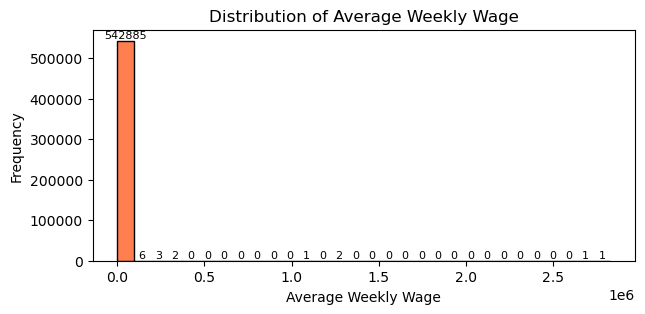

In [238]:
# Continuous Columns: Plotting Histogram with Count Labels Above the Bars
continuous_columns = ['Average Weekly Wage']

for column in continuous_columns:
    plt.figure(figsize=(7, 3))
    # Create histogram and store returned axes
    ax = df[column].plot(kind='hist', bins=30, color='coral', edgecolor='black')
    
    # Add count labels above each bar
    for patch in ax.patches:
        ax.annotate(f'{int(patch.get_height())}', 
                    (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                    ha='center', va='bottom', fontsize=8, color='black')

    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [239]:
df['Average Weekly Wage'].shape[0]

571445

In [240]:
df[df['Average Weekly Wage'] > 3000.00].shape[0]

5059

Since we have a lot of zeros, we will filtretthe plot.

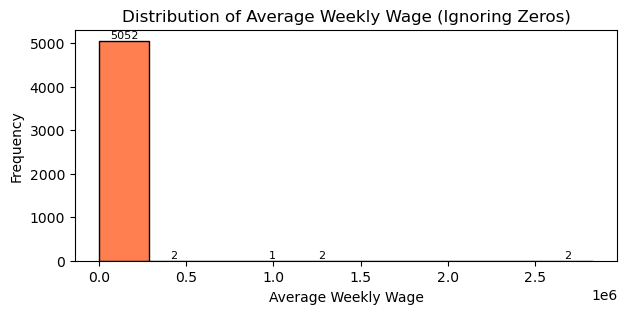

In [241]:
# Continuous Columns: Plotting Histogram with Count Labels Above the Bars, Ignoring Zeros
continuous_columns = ['Average Weekly Wage']

for column in continuous_columns:
    # Filter out rows with value equal to zero
    filtered_data = df[df[column] > 3000.00]

    plt.figure(figsize=(7, 3))
    # Create histogram with filtered data and store returned axes
    ax = filtered_data[column].plot(kind='hist', color='coral', edgecolor='black')
    
    # Add count labels above each bar
    for patch in ax.patches:
        if patch.get_height() > 0:  # Only add labels if count is greater than 0
            ax.annotate(f'{int(patch.get_height())}', 
                        (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                        ha='center', va='bottom', fontsize=8, color='black')

    plt.title(f'Distribution of {column} (Ignoring Zeros)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

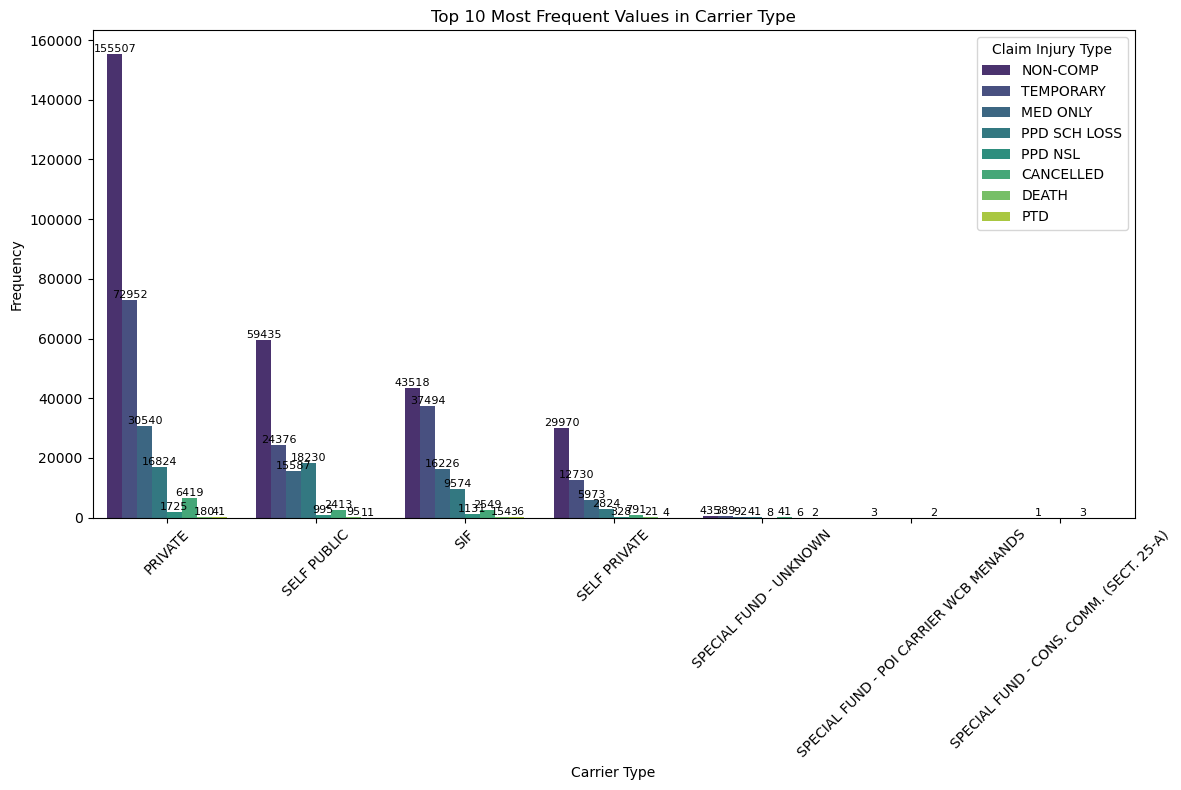

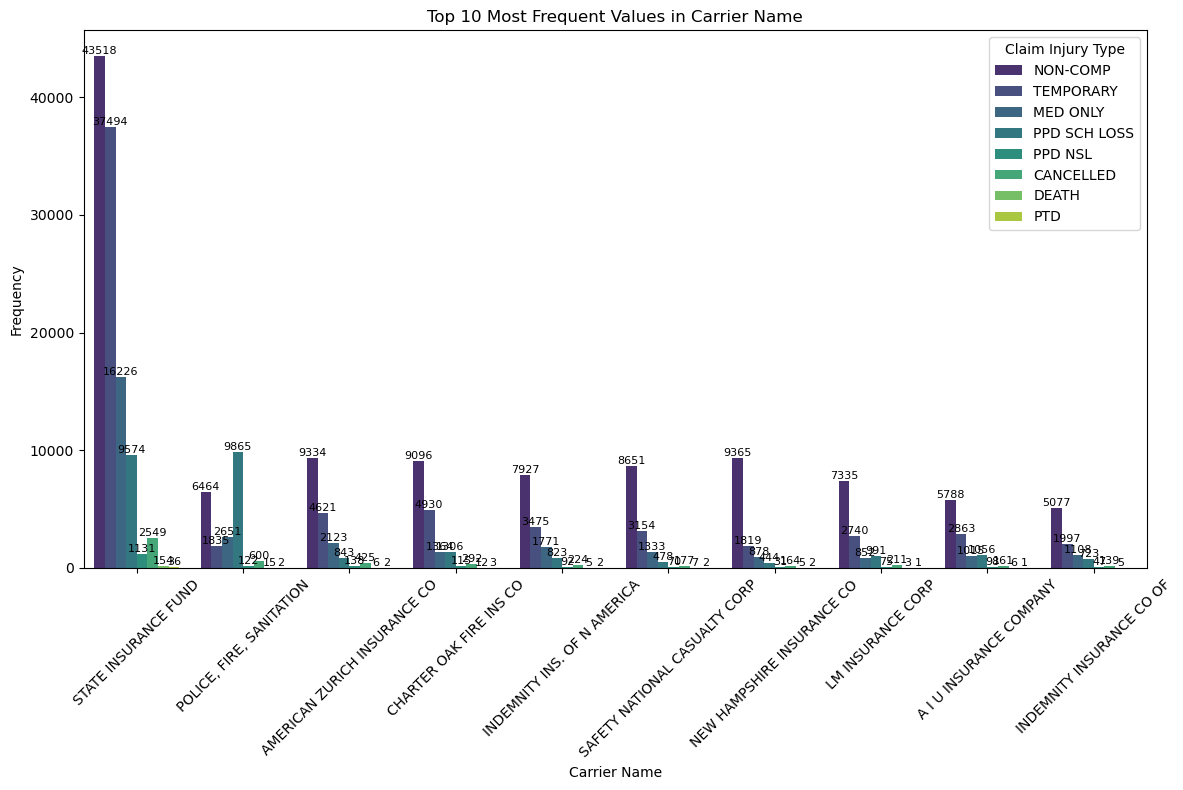

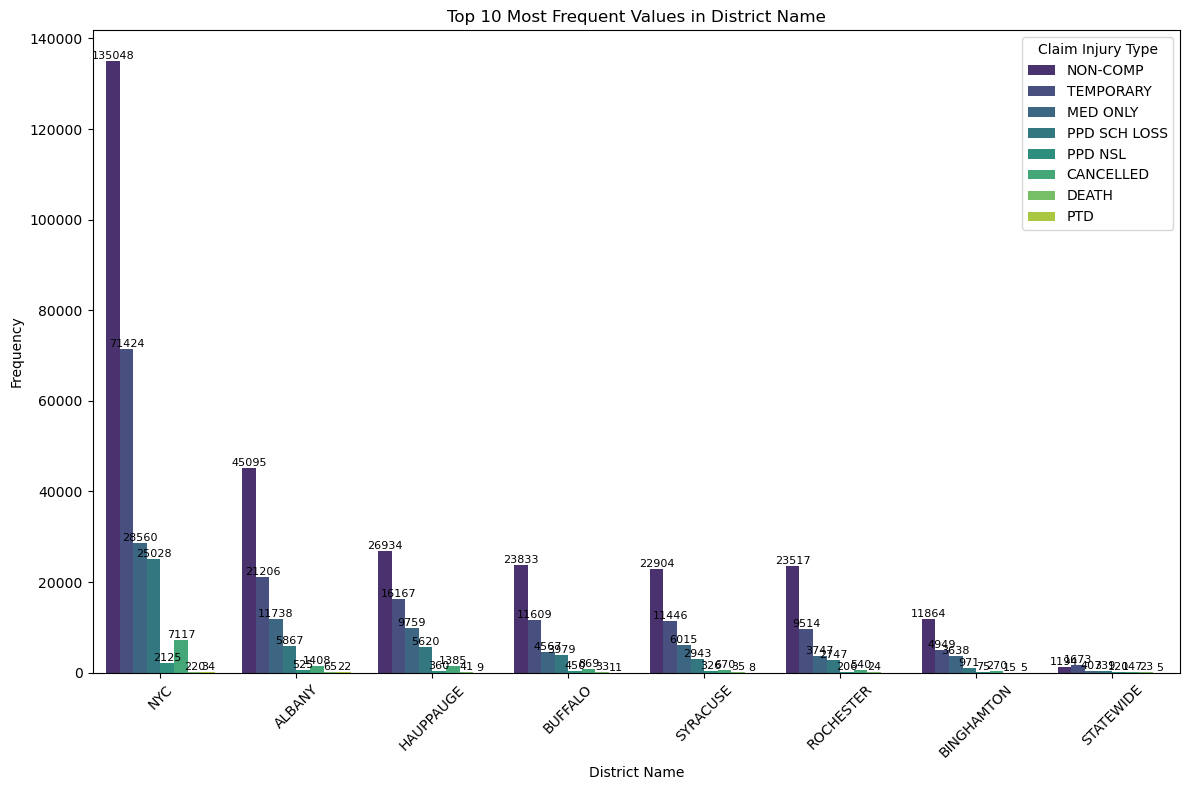

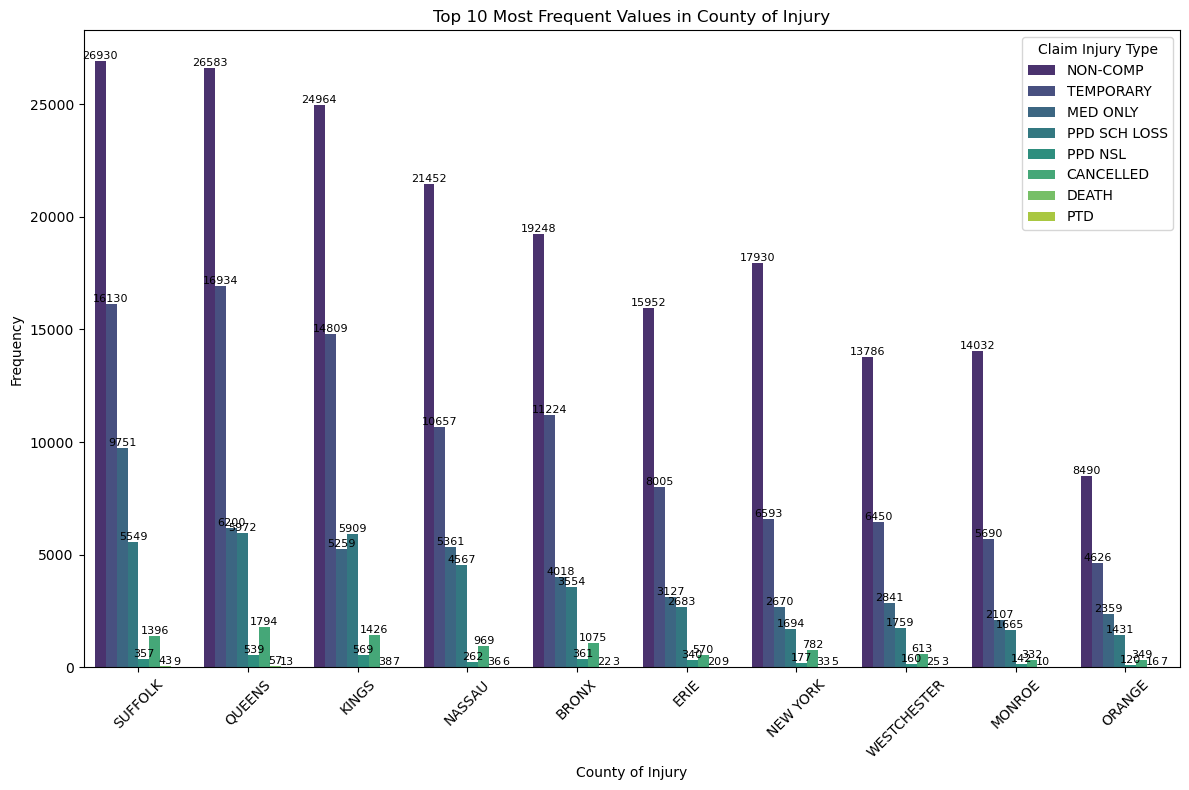

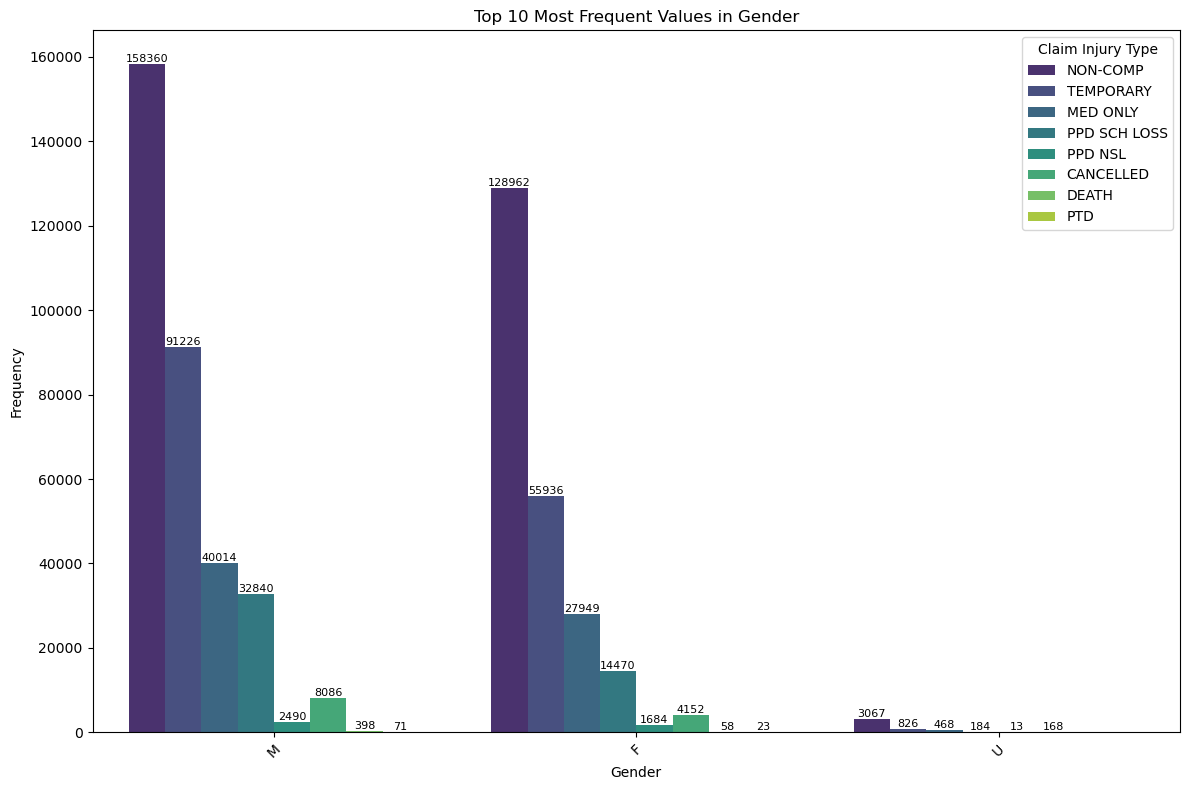

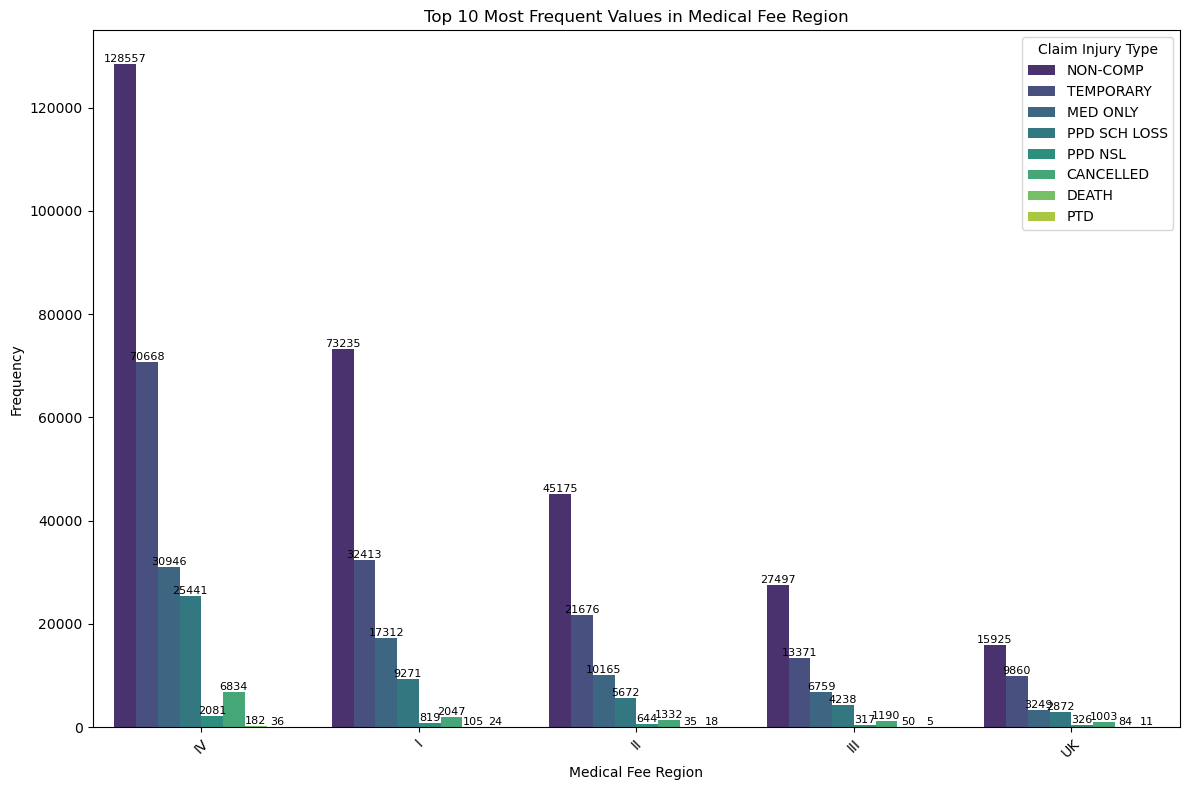

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical Columns: Plotting Frequency Distributions with Target as Hue
categorical_columns = ['Carrier Type', 'Carrier Name', 'District Name', 'County of Injury', 'Gender', 'Medical Fee Region']

# Loop through categorical columns and create separate figures
for column in categorical_columns:
    plt.figure(figsize=(12, 8))
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df, x=column, hue='Claim Injury Type', palette='viridis', order=df[column].value_counts().iloc[:10].index)
    
    # Set title and labels
    plt.title(f'Top 10 Most Frequent Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

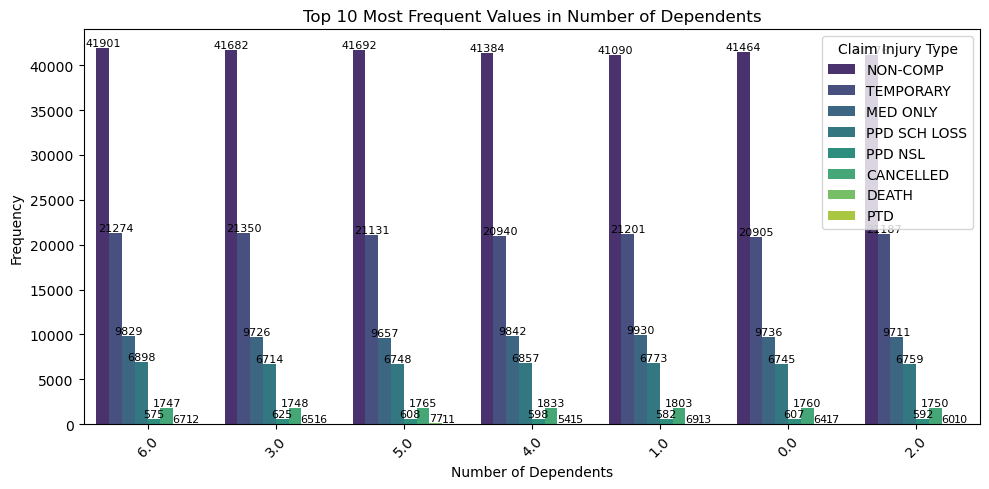

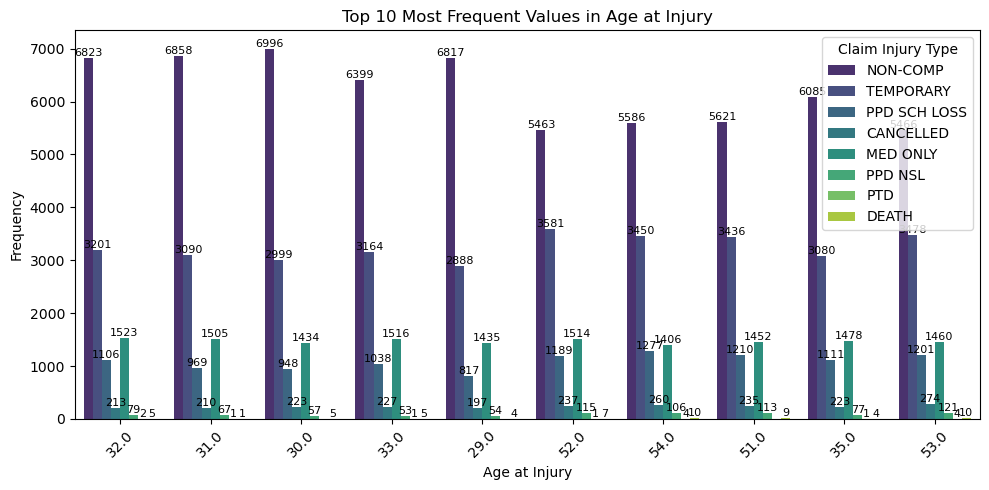

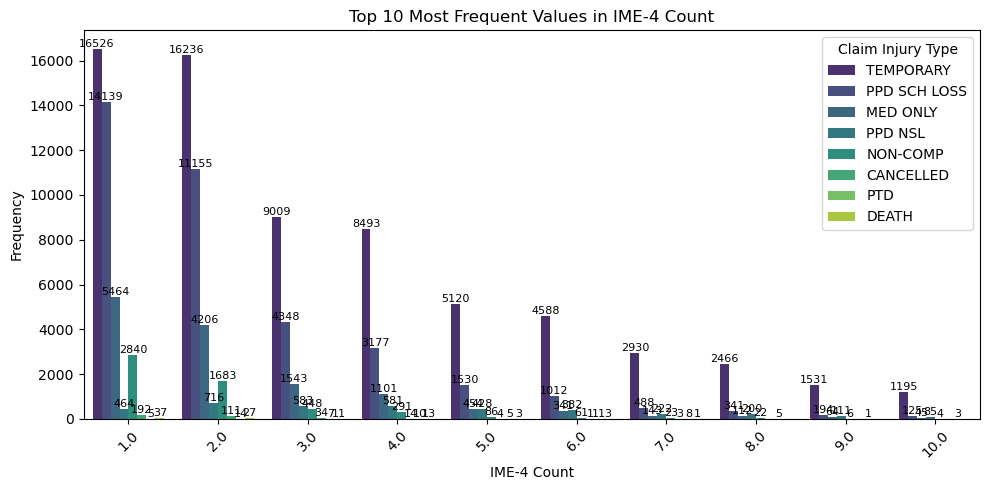

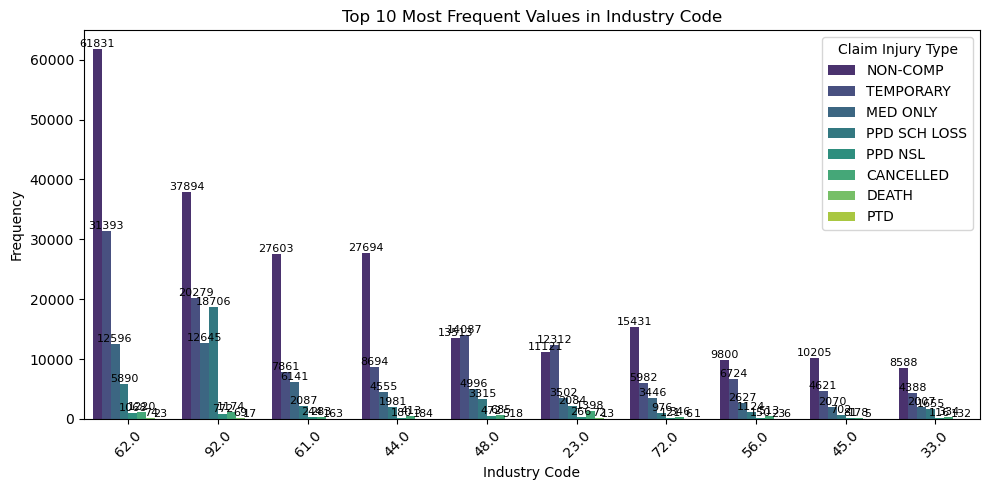

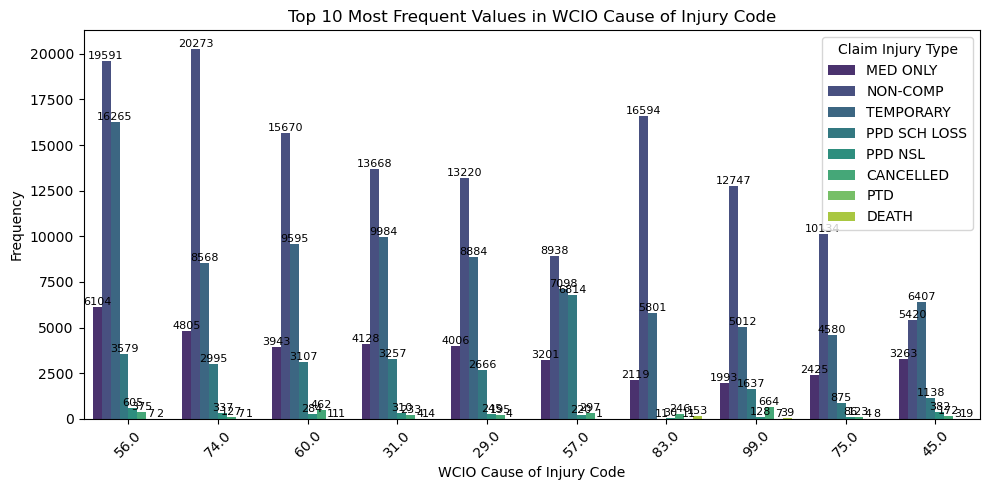

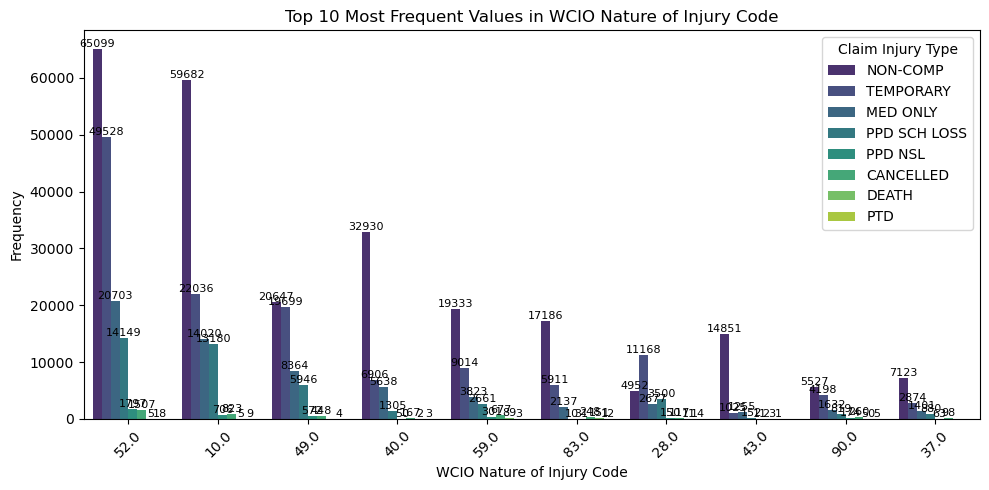

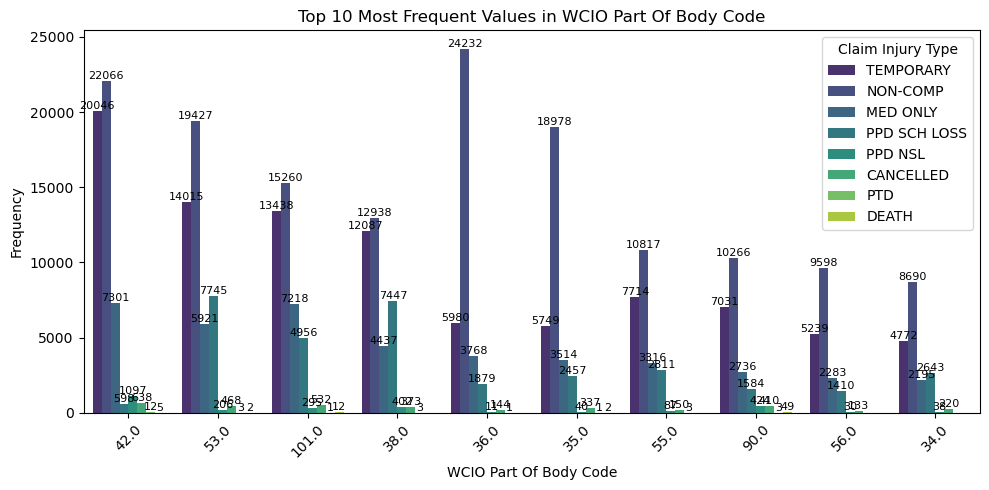

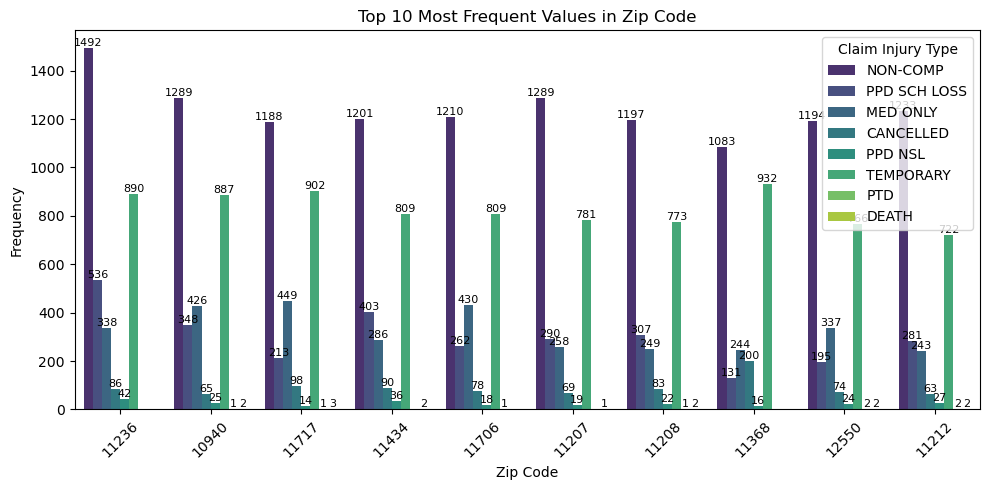

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

# Discrete Columns: Plotting Top 15 Most Frequent Values with Target as Hue
discrete_columns = ['Number of Dependents', 'Age at Injury', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code']

# Loop through discrete columns and create separate figures
for column in discrete_columns:
    plt.figure(figsize=(10, 5))
    
    # Select the top 10 most frequent values for the current column
    top_10_values = df[column].value_counts().nlargest(10).index
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df[df[column].isin(top_10_values)], x=column, hue='Claim Injury Type', palette='viridis', order=top_10_values)
    
    # Set title and labels
    plt.title(f'Top 10 Most Frequent Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

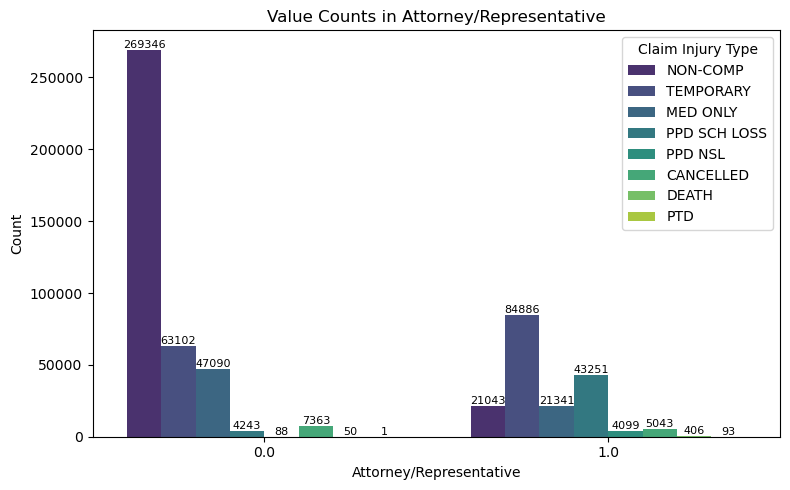

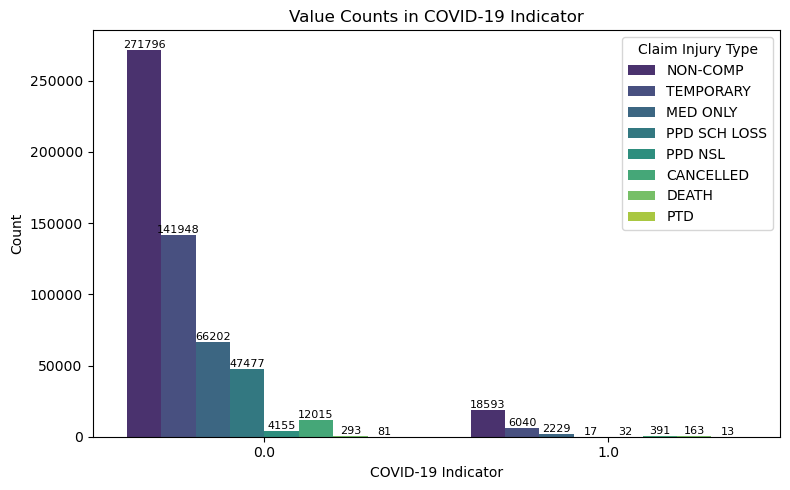

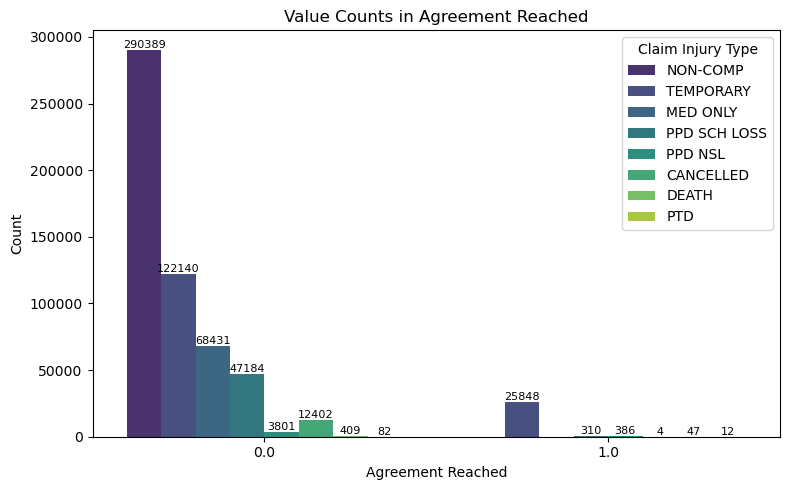

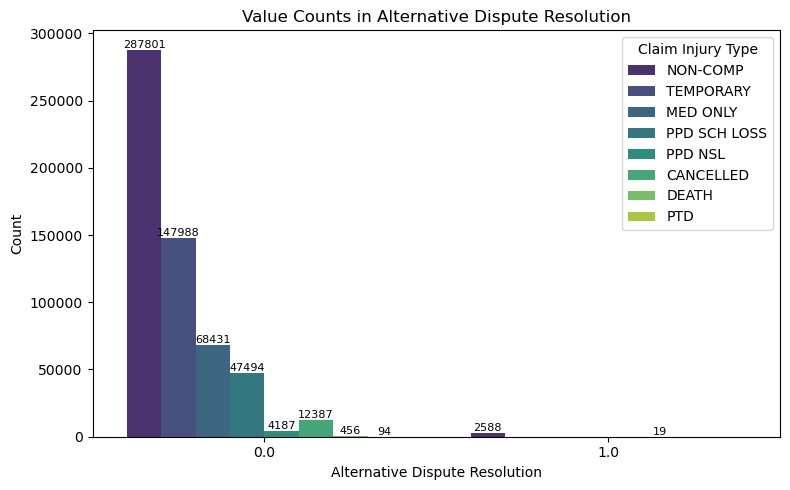

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

# Binary Columns: Plotting Counts of Values with Target as Hue
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator', 'Agreement Reached','Alternative Dispute Resolution']

# Loop through binary columns and create separate figures
for column in binary_columns:
    plt.figure(figsize=(8, 5))
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df, x=column, hue='Claim Injury Type', palette='viridis')
    
    # Set title and labels
    plt.title(f'Value Counts in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

# 4. Preprocessing the Dataset <a class="anchor" id="chapter4"></a>
In this chapter we will perform the basic steps to get to know our dataset.

## 4.1. Missing Values <a class="anchor" id="section_4_1"></a>


We may also have missing values that are incorrectly set to zero. Therefore, we will use .eq(0) to identify if there are any columns with zeros that are not supposed to have them.

In [245]:
df.eq(0).sum()

Accident Date                          0
Age at Injury                          0
Alternative Dispute Resolution    568838
Assembly Date                          0
Attorney/Representative           391283
Average Weekly Wage               334422
Birth Year                             0
C-2 Date                               0
C-3 Date                               0
Carrier Name                           0
Carrier Type                           0
Claim Injury Type                      0
County of Injury                       0
COVID-19 Indicator                543967
District Name                          0
First Hearing Date                     0
Gender                                 0
IME-4 Count                            0
Industry Code                          0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Zip Code                               0
Agreement Reache

In [246]:
# Set the threshold for zero values (e.g., more than 20% zeros)
threshold = 0.2

# Calculate the percentage of zeros for each column
zero_percentage = df.eq(0).mean()

# Filter columns that have more than the threshold of zero values
high_zero_columns = zero_percentage[zero_percentage > threshold]

# Display the columns with their zero percentage
print(high_zero_columns)

Alternative Dispute Resolution    0.995438
Attorney/Representative           0.684726
Average Weekly Wage               0.585222
COVID-19 Indicator                0.951915
Agreement Reached                 0.953439
dtype: float64


We found that only one column, Average Weekly Wage, contains an unexpectedly high number of zeros. Since this dataset is related to work insurance, every employee must have a weekly wage, meaning these zeros are likely incorrect and should be treated as missing values. Therefore, we will replace the zeros in the Average Weekly Wage column with NaN.

In [247]:
df['Average Weekly Wage'] = df['Average Weekly Wage'].replace(0, np.nan)

Now that we have addressed the Average Weekly Wage feature by treating zeros as missing values, we will proceed to examine the dataset for any remaining NaN values.

In [248]:
df.isnull().sum()

Accident Date                       3687
Age at Injury                      57195
Alternative Dispute Resolution         0
Assembly Date                          0
Attorney/Representative                0
Average Weekly Wage               362966
Birth Year                         54012
C-2 Date                           14527
C-3 Date                          385656
Carrier Name                           0
Carrier Type                        1769
Claim Injury Type                      0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                422193
Gender                                 0
IME-4 Count                       439826
Industry Code                       9913
Medical Fee Region                     0
WCIO Cause of Injury Code          15589
WCIO Nature of Injury Code         15606
WCIO Part Of Body Code             17046
Zip Code                           28845
Agreement Reache

In [249]:
# Set the threshold for missing values (e.g., more than 30% missing)
threshold = 0.2

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean()

# Filter columns that have more than the threshold of missing values
high_missing_columns = missing_percentage[missing_percentage > threshold]

# Display the columns with their missing percentage
print(high_missing_columns)

Average Weekly Wage    0.635172
C-3 Date               0.674879
First Hearing Date     0.738817
IME-4 Count            0.769673
dtype: float64


Based on the dataset description, the First Hearing Date feature contains missing values represented by NaN, but these values are meaningful, so we have decided not to remove this feature from the dataset. Since more than 70% of the entries are missing, we may consider creating a binary variable during feature engineering—e.g., 0 for NaN values and 1 otherwise.

Let's explore more about the rest of missing values.

> IME-4

In [250]:
df['IME-4 Count'].unique()

array([nan,  4.,  1.,  3.,  2.,  6.,  7.,  5., 10., 12.,  8.,  9., 11.,
       13., 14., 36., 15., 20., 19., 18., 27., 17., 16., 24., 22., 26.,
       21., 23., 30., 32., 39., 25., 29., 47., 48., 34., 28., 37., 31.,
       35., 33., 73.])

As IME-4 represents the number of independent medical audicts examination we decided to convert nan to 0 meaning that there wasn't any.

In [251]:
df['IME-4 Count'].fillna(0, inplace=True)
df['IME-4 Count'].unique()

array([ 0.,  4.,  1.,  3.,  2.,  6.,  7.,  5., 10., 12.,  8.,  9., 11.,
       13., 14., 36., 15., 20., 19., 18., 27., 17., 16., 24., 22., 26.,
       21., 23., 30., 32., 39., 25., 29., 47., 48., 34., 28., 37., 31.,
       35., 33., 73.])

> C-3 Date


We decided to drop C-3 Date based on the threshold that we pre defined meaning those features don't have enough predictive power based on the amount of missing information.


In [252]:
df = df.drop('C-3 Date', axis=1)

> Average Weekly Wage

For now, we will impute the missing values from Average Weekly Wage based on the Industry Code



In [253]:
# Step 1: Calculate the mean of 'Average Weekly Wage' for each 'Industry Code'
industry_means = df.groupby('Industry Code')['Average Weekly Wage'].mean()

# Step 2: Define a function to fill missing values based on 'Industry Code'
def impute_average_weekly_wage(row):
    if pd.isnull(row['Average Weekly Wage']):
        return industry_means.get(row['Industry Code'], row['Average Weekly Wage'])
    return row['Average Weekly Wage']

# Step 3: Apply the function to fill missing values in 'Average Weekly Wage'
df['Average Weekly Wage'] = df.apply(impute_average_weekly_wage, axis=1)

> Zip Code


Imputing the Zip Code based on Country of Injury and District Name



In [254]:
# Step 1: Create a function to impute Zip Code based on Country of Injury and District Name
def impute_zip_code(row, zip_code_mode):
    if pd.isna(row['Zip Code']):
        # Get the mode of the zip code for the given country and district
        return zip_code_mode.get((row['County of Injury'], row['District Name']), row['Zip Code'])
    return row['Zip Code']

# Step 2: Calculate the mode of Zip Code for each (Country of Injury, District Name) pair
zip_code_mode = df.groupby(['County of Injury', 'District Name'])['Zip Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 3: Apply the imputation function
df['Zip Code'] = df.apply(impute_zip_code, axis=1, zip_code_mode=zip_code_mode)

> Industry Code

Imputing the Industry Code based on carrier name and carrier type

In [255]:
# Step 1: Create a function to impute Industry Code based on Carrier Name and Carrier Type
def impute_industry_code(row, industry_code_mode):
    if pd.isna(row['Industry Code']):
        # Get the mode of the industry code for the given carrier name and carrier type
        return industry_code_mode.get((row['Carrier Name'], row['Carrier Type']), row['Industry Code'])
    return row['Industry Code']

# Step 2: Calculate the mode of Industry Code for each (Carrier Name, Carrier Type) pair
industry_code_mode = df.groupby(['Carrier Name', 'Carrier Type'])['Industry Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Step 3: Apply the imputation function
df['Industry Code'] = df.apply(impute_industry_code, axis=1, industry_code_mode=industry_code_mode)

> Assembly Date

Imputing the Industry Code based on carrier name and carrier type

In [256]:
# Ensure 'Assembly Date' is in datetime format
df['Assembly Date'] = pd.to_datetime(df['Assembly Date'], errors='coerce')

# Step 1: Create a function to impute Birth Year based on Assembly Date and Age at Injury
def impute_birth_year(row):
    if pd.isna(row['Birth Year']):
        if pd.notna(row['Assembly Date']) and pd.notna(row['Age at Injury']):
            # Calculate birth year by subtracting age at injury from assembly year
            assembly_year = row['Assembly Date'].year
            return float(assembly_year - row['Age at Injury'])
    return row['Birth Year']

# Step 2: Apply the function to fill in missing Birth Year values
df['Birth Year'] = df.apply(impute_birth_year, axis=1)

> Age at Injury

In [257]:
df['Age at Injury'] = df['Accident Year'] - df['Birth Year']

In [258]:
df = df.drop('Accident Year', axis=1)

# dar impute com o nn

In [259]:
missing_percentage = df.isnull().mean() * 100
missing_percentage

Accident Date                      0.645206
Age at Injury                     10.008837
Alternative Dispute Resolution     0.000000
Assembly Date                      0.000000
Attorney/Representative            0.000000
Average Weekly Wage                1.691676
Birth Year                         9.451828
C-2 Date                           2.542152
Carrier Name                       0.000000
Carrier Type                       0.309566
Claim Injury Type                  0.000000
County of Injury                   0.000000
COVID-19 Indicator                 0.000000
District Name                      0.000000
First Hearing Date                73.881651
Gender                             0.000000
IME-4 Count                        0.000000
Industry Code                      0.206144
Medical Fee Region                 0.000000
WCIO Cause of Injury Code          2.727997
WCIO Nature of Injury Code         2.730971
WCIO Part Of Body Code             2.982964
Zip Code                        

We still have some missing values, for now we will delete these rows and calculate the amount of percentage in the original dataset. Excluding the NaN in First Hearing Date.

In [260]:
# Identify rows with missing values, excluding 'First Hearing Date'
missing_values = df[df.columns.difference(['First Hearing Date'])].isna().any(axis=1)

# Calculate the percentage of rows that have missing values (excluding 'First Hearing Date')
percentage_missing = (missing_values.sum() / len(df)) * 100

# Print the percentage of rows with missing values
print(f"Percentage of rows with missing values (excluding 'First Hearing Date'): {percentage_missing:.2f}%")


Percentage of rows with missing values (excluding 'First Hearing Date'): 12.50%


Despite representing 12,50% we will for now delete these rows.

In [261]:
# Drop rows with missing values, excluding 'First Hearing Date'
df_cleaned = df[~missing_values]

# Verify the shape of the dataset after deletion
print(f"Number of rows after removing rows with missing values: {df_cleaned.shape[0]}")

Number of rows after removing rows with missing values: 500029


In [262]:
missing_percentage = df_cleaned.isnull().mean() * 100
missing_percentage

Accident Date                      0.000000
Age at Injury                      0.000000
Alternative Dispute Resolution     0.000000
Assembly Date                      0.000000
Attorney/Representative            0.000000
Average Weekly Wage                0.000000
Birth Year                         0.000000
C-2 Date                           0.000000
Carrier Name                       0.000000
Carrier Type                       0.000000
Claim Injury Type                  0.000000
County of Injury                   0.000000
COVID-19 Indicator                 0.000000
District Name                      0.000000
First Hearing Date                73.540135
Gender                             0.000000
IME-4 Count                        0.000000
Industry Code                      0.000000
Medical Fee Region                 0.000000
WCIO Cause of Injury Code          0.000000
WCIO Nature of Injury Code         0.000000
WCIO Part Of Body Code             0.000000
Zip Code                        

## 4.2. Outliers <a class="anchor" id="section_4_2"></a>


Honestly idk how to do this part, the box plot only makes sense for the Avg Weekly age, because the rest is discrete.

In [263]:
# # Define metric and non-metric features
# metric_features = df_cleaned.select_dtypes(include=['number']).columns.tolist()
# non_metric_features = df_cleaned.select_dtypes(exclude=['number']).columns.tolist()


# # Output the results
# print(f"Non-metric features: {non_metric_features}")
# print(f"Metric features: {metric_features}")

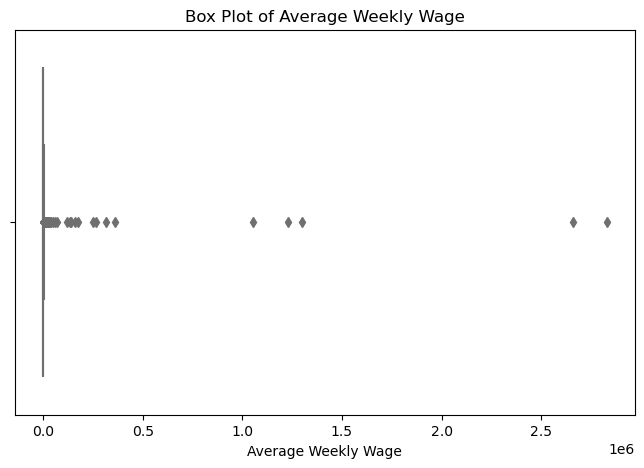

In [264]:
# Plotting Box Plots for Continuous Columns
for column in continuous_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_cleaned, x=column, color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [265]:
discrete_columns

['Number of Dependents',
 'Age at Injury',
 'IME-4 Count',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Zip Code']

In [266]:
discrete_columns= ['Number of Dependents',
 'Age at Injury',
 'IME-4 Count',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code']

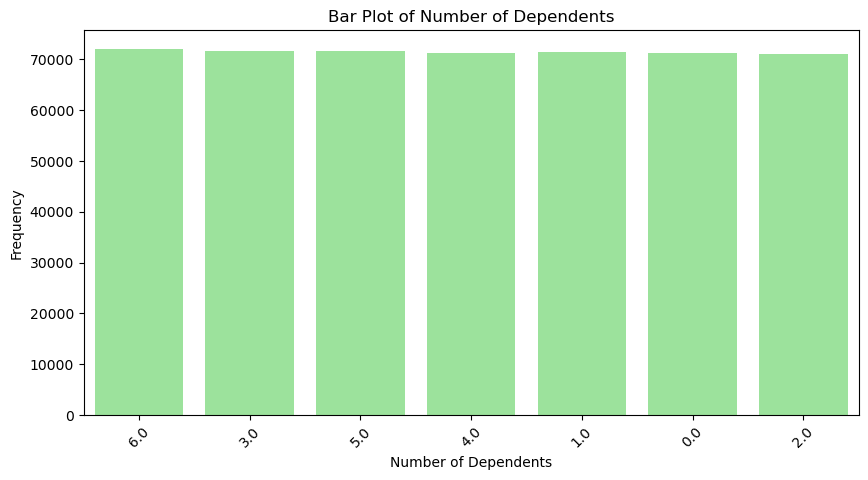

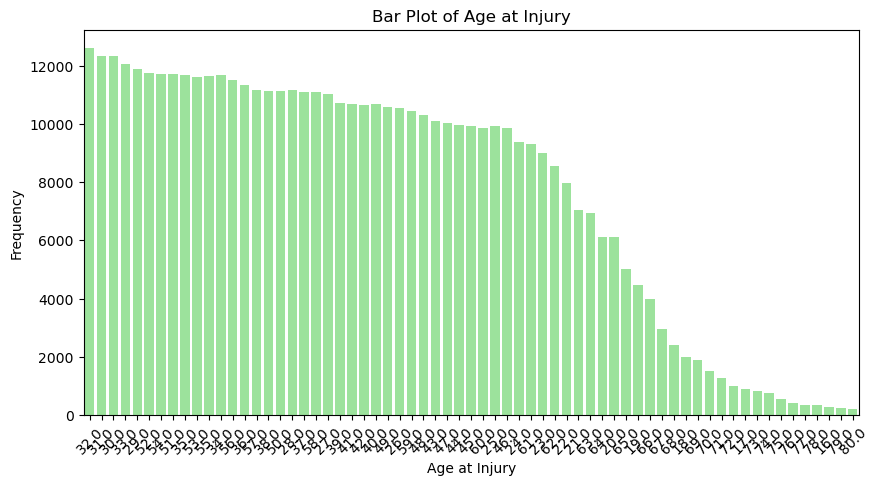

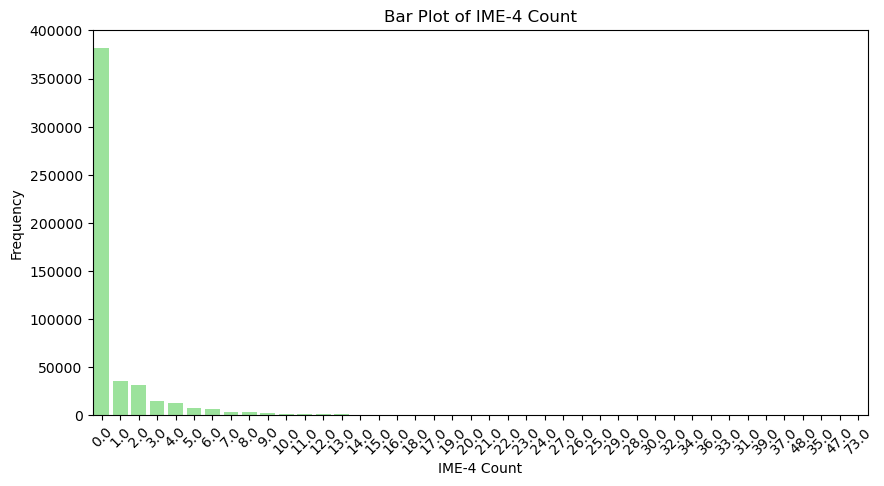

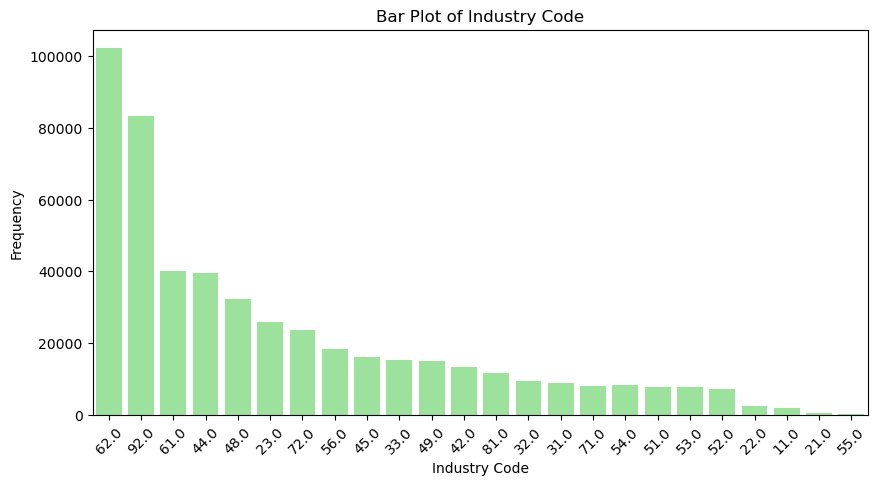

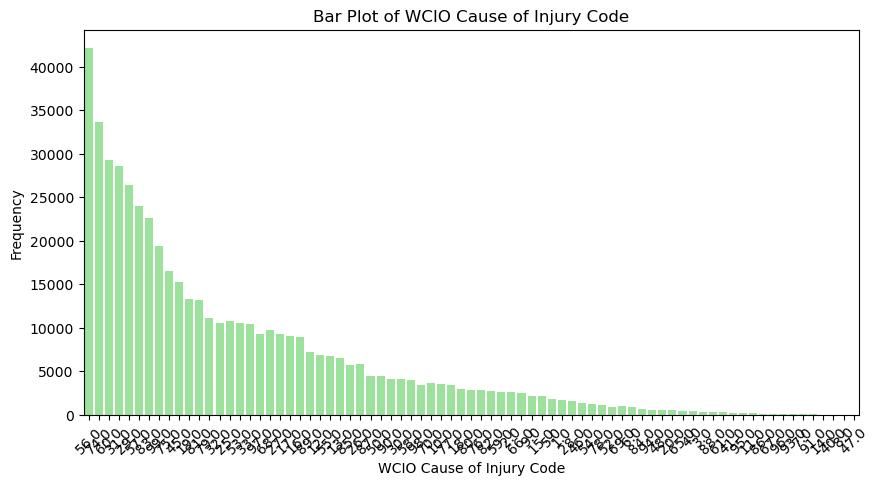

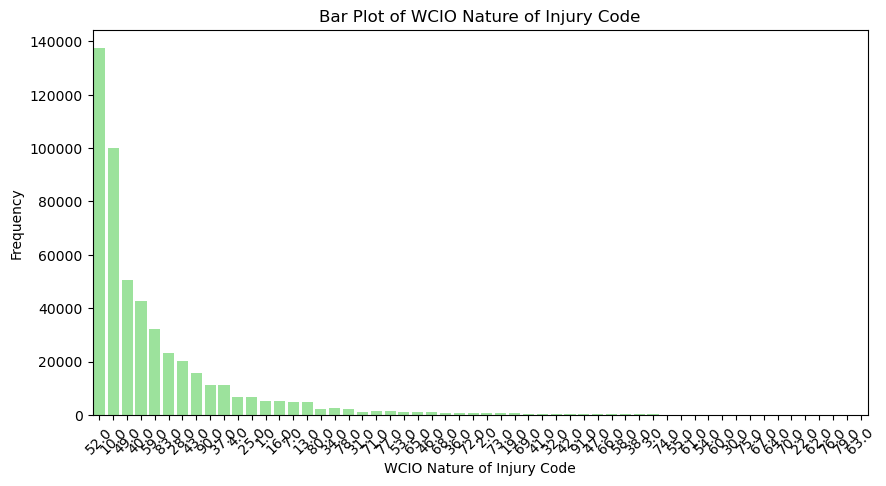

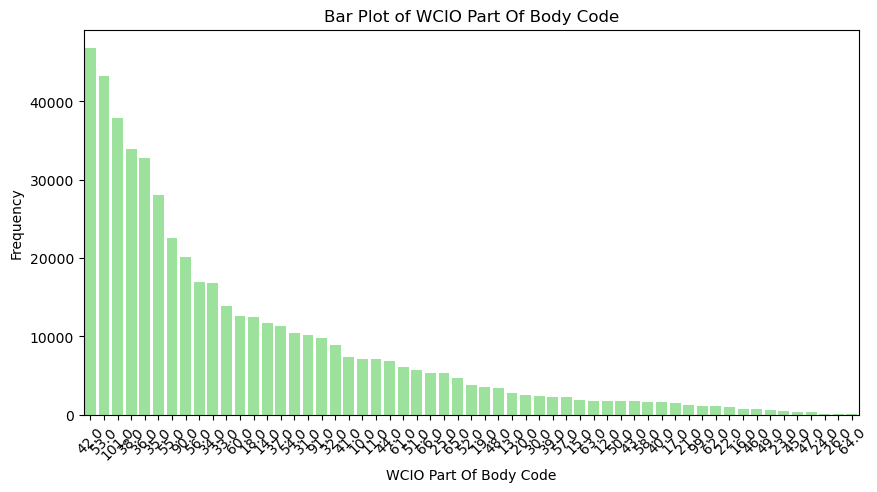

In [267]:
# Plotting Bar Plots for Discrete Columns
for column in discrete_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_cleaned, x=column, color='lightgreen', order=df[column].value_counts().index)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

Also here we can really calculate the interquantile range and blablabla and explore more the outliers
Do we have outliers? the only one i can see is the Avg Weekly age.But we have so many problems with these column ahahah, maybe we can create some feature with the range of avg weekly age, for example, categories:
- low income
- avg
- high income.

## 4.3. Categorical Features <a class="anchor" id="section_4_3"></a>
What should we do? encoding?

this prob makes more sense after the feature enginerring because we can create some features bases on these one

In [268]:
features_categorical = [
    'Alternative Dispute Resolution',
    'Attorney/Representative',
    'COVID-19 Indicator',
    'County of Injury',
    'Carrier Type',
    'District Name',
    'Gender',
    'Industry Code Description',
    'Medical Fee Region'
]

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [269]:
features_categorical

['Alternative Dispute Resolution',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'County of Injury',
 'Carrier Type',
 'District Name',
 'Gender',
 'Industry Code Description',
 'Medical Fee Region']

In [270]:
features_categorical= ['Alternative Dispute Resolution',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'County of Injury',
 'Carrier Type',
 'District Name',
 'Gender',
 'Medical Fee Region']

Alternative Dispute Resolution
float64


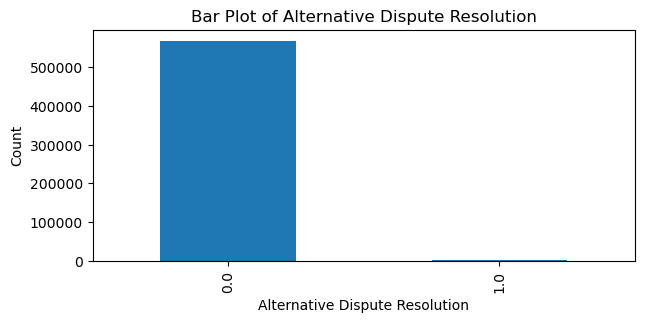

Attorney/Representative
float64


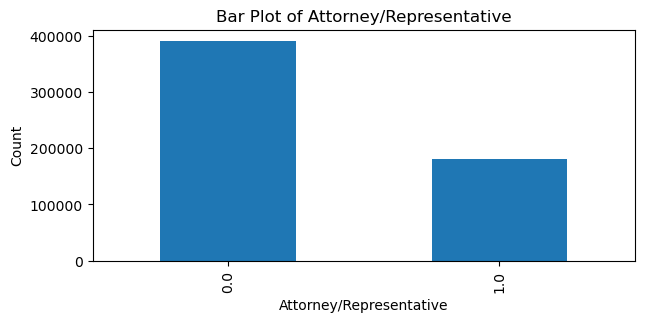

COVID-19 Indicator
float64


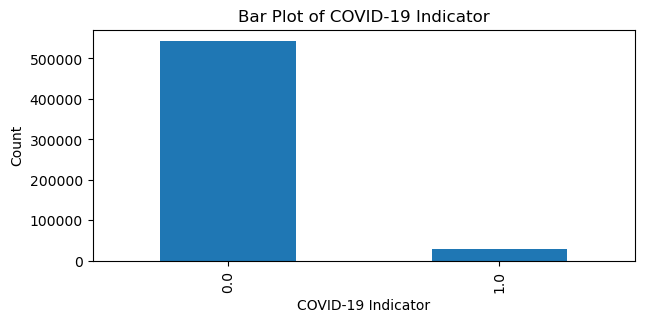

County of Injury
object


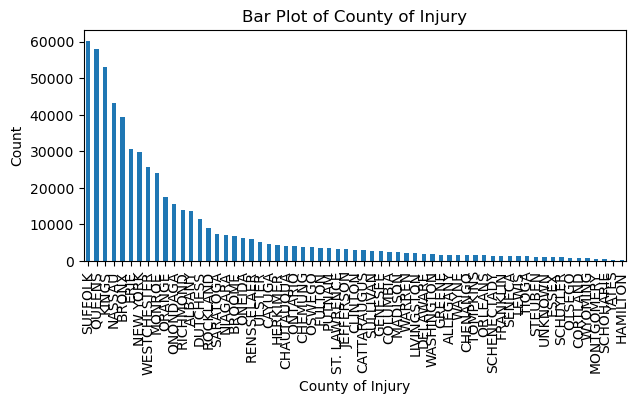

Carrier Type
object


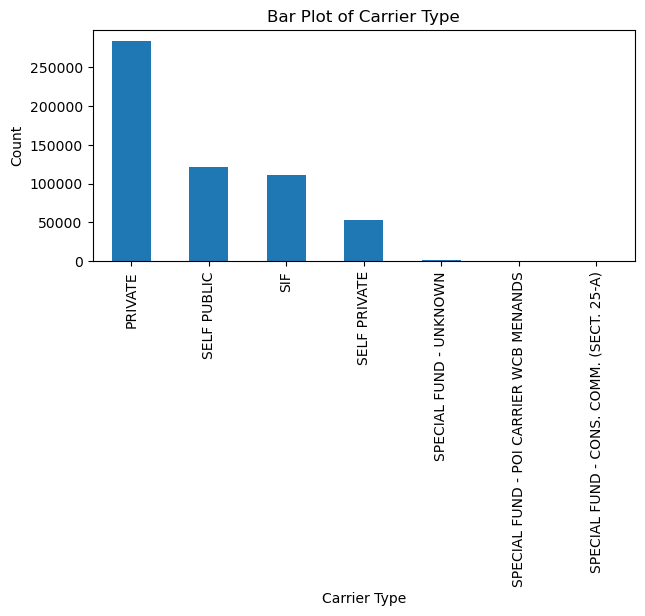

District Name
object


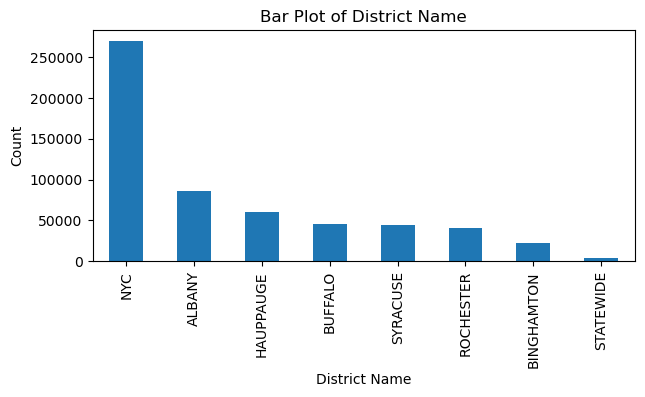

Gender
object


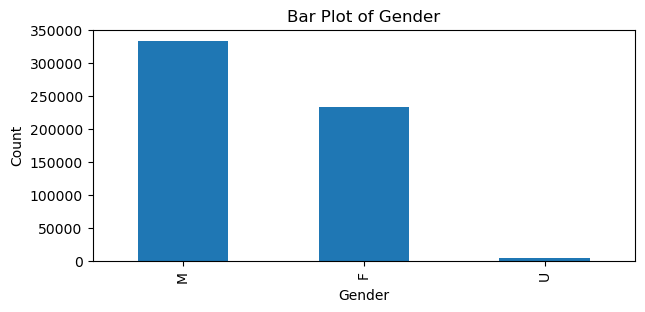

Medical Fee Region
object


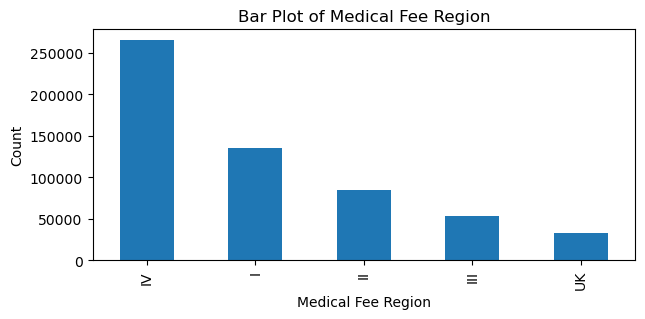

In [271]:
for feature in features_categorical:
    print(feature)
    print(df_cleaned[feature].dtype)
    df[feature].value_counts().plot(kind='bar', figsize=(7, 3))
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# 5. Feature Engineering <a class="anchor" id="chapter5"></a>

here we should think about creating new features

## 5.1. Carrier-District Interaction
Combining Carrier Type with District Name may reveal regional preferences for certain insurance carriers, which could be useful in understanding regional biases or regulations.

In [272]:
# Creating a new feature by combining Carrier Type and District Name
df_cleaned['Carrier_District_Interaction'] = df_cleaned['Carrier Type'] + "_" + df['District Name']

C:\Users\xandg\AppData\Local\Temp\ipykernel_26460\2145385865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Carrier_District_Interaction'] = df_cleaned['Carrier Type'] + "_" + df['District Name']


## 5.2. Industry-Body Interaction

Certain industries may be more prone to specific injuries, and combining Industry Code with WCIO Part Of Body Code could help capture these relationships and provide better context to the model.

In [273]:
# Creating a new feature by combining Industry Code and WCIO Part Of Body Code
# df_cleaned['Industry_Body_Interaction'] = df_cleaned['Industry Code'].astype(str) + "_" + df['WCIO Part Of Body Code'].astype(str)

## 5.3. Income Category

Creating categories for Average Weekly Wage can simplify the continuous nature of income into meaningful segments such as Low, Average, and High, which could help the model understand different socioeconomic statuses.

In [274]:
# Defining the bins and labels for categorizing income
income_bins = [-float('inf'), 500, 1000, float('inf')]
income_labels = ['Low Income', 'Average Income', 'High Income']

# Creating the new feature for income categories
df_cleaned['Income_Category'] = pd.cut(df_cleaned['Average Weekly Wage'], bins=income_bins, labels=income_labels)


C:\Users\xandg\AppData\Local\Temp\ipykernel_26460\2084783832.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Income_Category'] = pd.cut(df_cleaned['Average Weekly Wage'], bins=income_bins, labels=income_labels)


## 5.4. Has First Hearing Date

Since First Hearing Date has a significant amount of missing values, transforming it into a binary feature (1 if it exists, 0 if it doesn't) will allow the model to consider the presence or absence of this date as a factor.


In [275]:
# Creating a binary feature indicating the presence of First Hearing Date
df_cleaned['Has_1st_Hearing_Date'] = df_cleaned['First Hearing Date'].notna().astype(int)

C:\Users\xandg\AppData\Local\Temp\ipykernel_26460\3624143626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Has_1st_Hearing_Date'] = df_cleaned['First Hearing Date'].notna().astype(int)


## 5.5. Accident Quarter 
Temporal data can often influence outcomes. Extracting the quarter of the accident (e.g., 1st, 2nd, etc.)

In [276]:
# Extracting the quarter of the Accident Date
df_cleaned['Accident_Quarter'] = pd.to_datetime(df_cleaned['Accident Date'], errors='coerce').dt.quarter

C:\Users\xandg\AppData\Local\Temp\ipykernel_26460\992401898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Accident_Quarter'] = pd.to_datetime(df_cleaned['Accident Date'], errors='coerce').dt.quarter


## 5.6. Accident Year
The year can help the model understand seasonal or yearly effects, like accident patterns during different times of the year.

In [277]:
# Extracting the year from the Accident Date
df_cleaned['Accident_Year'] = pd.to_datetime(df_cleaned['Accident Date'], errors='coerce').dt.year

C:\Users\xandg\AppData\Local\Temp\ipykernel_26460\561170082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Accident_Year'] = pd.to_datetime(df_cleaned['Accident Date'], errors='coerce').dt.year


## 5.7. Reporting_Delay

Calculating the number of days between Assembly Date and Accident Date could reveal useful information regarding the time elapsed between key events, which might be an important factor in modeling outcomes.

In [278]:
# Converting dates to datetime format
df_cleaned['Accident Date'] = pd.to_datetime(df_cleaned['Accident Date'], errors='coerce')
df_cleaned['Assembly Date'] = pd.to_datetime(df_cleaned['Assembly Date'], errors='coerce')

# Calculating the difference in days between Assembly Date and Accident Date
df_cleaned.loc[:, 'Reporting_Delay'] = (df_cleaned['Accident Date'] - df_cleaned['Assembly Date']).dt.days


C:\Users\xandg\AppData\Local\Temp\ipykernel_26460\2086707890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Accident Date'] = pd.to_datetime(df_cleaned['Accident Date'], errors='coerce')
C:\Users\xandg\AppData\Local\Temp\ipykernel_26460\2086707890.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Assembly Date'] = pd.to_datetime(df_cleaned['Assembly Date'], errors='coerce')
C:\Users\xandg\AppData\Local\Temp\ipykernel_26460\2086707890.py:6: SettingWithCopyWarning: 
A value is t

## 5.8. Accident on Weekend

The day of the accident could be significant. Weekends might have different risk factors compared to weekdays.

In [279]:
# Extracting the day of the week and creating a feature to indicate if the accident occurred on a weekend
df_cleaned['Accident Day'] = pd.to_datetime(df_cleaned['Accident Date'], errors='coerce').dt.dayofweek
df_cleaned['Accident on Weekend'] = df_cleaned['Accident Day'].apply(lambda x: 1 if x >= 5 else 0)

C:\Users\xandg\AppData\Local\Temp\ipykernel_26460\1742892420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Accident Day'] = pd.to_datetime(df_cleaned['Accident Date'], errors='coerce').dt.dayofweek
C:\Users\xandg\AppData\Local\Temp\ipykernel_26460\1742892420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Accident on Weekend'] = df_cleaned['Accident Day'].apply(lambda x: 1 if x >= 5 else 0)


## 5.9. Age Group

Grouping ages can help simplify the model’s understanding of different age demographics (e.g., Youth, Adult, Senior). This could potentially improve model interpretability and performance.

In [280]:
# Creating bins and labels for age groups
age_bins = [0, 25, 45, 65, float('inf')]
age_labels = ['Youth', 'Young Adult', 'Middle Age', 'Senior']

# Creating a new feature for age groups
df_cleaned['Age Group'] = pd.cut(df_cleaned['Age at Injury'], bins=age_bins, labels=age_labels)

C:\Users\xandg\AppData\Local\Temp\ipykernel_26460\2940560654.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age Group'] = pd.cut(df_cleaned['Age at Injury'], bins=age_bins, labels=age_labels)


## 5.10. Time from Assembly Date to C-2 Filing

This feature measures the time it took between assembling the claim and reaching the C-2 filing milestone. It indicates the duration for processing or verifying the claim between initial reporting and a formal milestone.


In [281]:
# Calculate the time from Assembly Date to C-2 Date (in days)
df['Time_Assembly_to_C2'] = (df['C-2 Date'] - df['Assembly Date']).dt.days

## 5.11. Time from Accident to C-2 Filing

This feature represents the delay between the accident itself and the C-2 event. This helps to understand the promptness of reporting or reacting to the injury

In [282]:
# Calculate the time from Accident Date to C-2 Date (in days)
df['Time_Accident_to_C2'] = (df['C-2 Date'] - df['Accident Date']).dt.days

After creating new features based on the existing date columns, we will remove the original date features to avoid redundancy and simplify the dataset. We believe that the impact of these date features is adequately captured in the newly engineered features.

In [283]:
df_cleaned = df_cleaned.drop(columns=['Accident Date', 'First Hearing Date', 'Assembly Date', 'C-2 Date'])

## 5.12. ZIP Code Region

The first two digits of the ZIP Code typically represent a broader region, which could provide some geographic insights without the granularity of the full ZIP Code. This simplification can make the model more interpretable and help reduce the feature dimensionality.

In [284]:
# Extracting the first two digits of the ZIP Code to create a region-based feature
df_cleaned['Zip Code Region'] = df_cleaned['Zip Code'].astype(str).str[:2]

In [285]:
df_cleaned['Zip Code'].nunique()

1789

In [286]:
df_cleaned['Zip Code Region'].nunique()

26

For this motive we will delete also the Zip Code, for now.

In [287]:
df_cleaned = df_cleaned.drop(columns=['Zip Code'])

## 5.12. Is UK Medical Fee Region

he Medical Fee Region has a value UK, which indicates it is outside the typical US regions (like I, II, etc.). Creating a binary feature to flag if the region is UK or not can help the model differentiate between local and foreign medical fee regions

In [288]:
# Creating a binary feature indicating if Medical Fee Region is 'UK'
df_cleaned['Is_UK'] = df_cleaned['Medical Fee Region'].apply(lambda x: 1 if x == 'UK' else 0)

## 5.13. Carrier Type Merged

Since there are several categories under "Special Fund" with very few occurrences, combining them into a single category can reduce noise in the data and make the feature more manageable for the model.

In [289]:
# Creating a new feature that merges all 'Special Fund' categories into a single category
df_cleaned['Carrier Type Merged'] = df_cleaned['Carrier Type'].replace({
    'SPECIAL FUND - UNKNOWN': 'SPECIAL FUND',
    'SPECIAL FUND - POI CARRIER WCB MENANDS': 'SPECIAL FUND',
    'SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 'SPECIAL FUND'
})

# Verifying the updated column
df_cleaned['Carrier Type Merged'].value_counts()

PRIVATE         249924
SELF PUBLIC     107554
SIF              98402
SELF PRIVATE     43561
SPECIAL FUND       588
Name: Carrier Type Merged, dtype: int64

For now we will also delete the Carrier Type

In [290]:
df_cleaned = df_cleaned.drop(columns=['Carrier Type'])

## 5.14. Carrier_Name_Simplified

The 'Carrier Name' feature has a high cardinality, which means there are many unique values—1951 in total. Having too many unique categories can cause problems in machine learning models, especially if some categories have very few instances. To simplify the analysis and improve the model performance, we will group carrier names with fewer than 3000 occurrences under a single category called 'OTHER'.


In [291]:
# Print the most frequent Carrier Names along with their counts
most_frequent_carriers = df_cleaned['Carrier Name'].value_counts().head(25)  # Adjust the number if you need more
print("Most frequent Carrier Names with their counts:")
print(most_frequent_carriers)


Most frequent Carrier Names with their counts:
STATE INSURANCE FUND             98402
POLICE, FIRE, SANITATION         19015
AMERICAN ZURICH INSURANCE CO     15504
CHARTER OAK FIRE INS CO          15249
INDEMNITY INS. OF N AMERICA      12584
SAFETY NATIONAL CASUALTY CORP    12378
NEW HAMPSHIRE INSURANCE CO       11362
LM INSURANCE CORP                10860
A I U INSURANCE COMPANY           9739
INDEMNITY INSURANCE CO OF         7973
NYC TRANSIT AUTHORITY             6883
HARTFORD ACCIDENT & INDEMNITY     6695
NEW YORK BLACK CAR OPERATORS'     6634
ARCH INDEMNITY INSURANCE CO.      5944
AIU INSURANCE CO                  5680
CNY OTHER THAN ED, HED WATER      5360
HEALTH & HOSPITAL CORP.           5056
ARCH INDEMNITY INSURANCE CO       4850
PENNSYLVANIA MANUFACTURERS'       4353
PUBLIC EMPLOYERS RISK MGMT.       3995
ACE AMERICAN INSURANCE CO.        3847
OLD REPUBLIC INSURANCE CO.        3798
MEMIC INDEMNITY COMPANY           3642
WAL-MART ASSOCIATES, INC.         3513
COUNTY OF NASSAU 

In [293]:
# Create a new feature called 'Carrier_Name_Simplified' based on 'Carrier Name'
df_cleaned['Carrier_Name_Simplified'] = df_cleaned['Carrier Name']

# Identify carrier names that occur fewer than 300 times
carrier_counts = df_cleaned['Carrier Name'].value_counts()
carriers_to_replace = carrier_counts[carrier_counts < 3000].index

# Replace carrier names with fewer than 300 occurrences with 'OTHER' in the new column
df_cleaned['Carrier_Name_Simplified'] = df_cleaned['Carrier_Name_Simplified'].replace(carriers_to_replace, 'OTHER')

# Print the counts of the simplified carrier names to verify the result
print("Counts of 'Carrier_Name_Simplified' feature:")
print(df_cleaned['Carrier_Name_Simplified'].value_counts())

Counts of 'Carrier_Name_Simplified' feature:
OTHER                            203448
STATE INSURANCE FUND              98402
POLICE, FIRE, SANITATION          19015
AMERICAN ZURICH INSURANCE CO      15504
CHARTER OAK FIRE INS CO           15249
INDEMNITY INS. OF N AMERICA       12584
SAFETY NATIONAL CASUALTY CORP     12378
NEW HAMPSHIRE INSURANCE CO        11362
LM INSURANCE CORP                 10860
A I U INSURANCE COMPANY            9739
INDEMNITY INSURANCE CO OF          7973
NYC TRANSIT AUTHORITY              6883
HARTFORD ACCIDENT & INDEMNITY      6695
NEW YORK BLACK CAR OPERATORS'      6634
ARCH INDEMNITY INSURANCE CO.       5944
AIU INSURANCE CO                   5680
CNY OTHER THAN ED, HED WATER       5360
HEALTH & HOSPITAL CORP.            5056
ARCH INDEMNITY INSURANCE CO        4850
PENNSYLVANIA MANUFACTURERS'        4353
PUBLIC EMPLOYERS RISK MGMT.        3995
ACE AMERICAN INSURANCE CO.         3847
OLD REPUBLIC INSURANCE CO.         3798
MEMIC INDEMNITY COMPANY            

In [294]:
df_cleaned = df_cleaned.drop(columns=['Carrier Name'])

# 6. Feature Selection <a class="anchor" id="chapter6"></a>
To start with the feature selection we first need to split our train dataset into X and y. And then split into train and validation.

In [295]:
df_cleaned.describe(include='O').T

,count,unique,top,freq
Claim Injury Type,500029,8,NON-COMP,252467
County of Injury,500029,63,SUFFOLK,53725
District Name,500029,8,NYC,235000
Gender,500029,3,M,289669
Medical Fee Region,500029,5,IV,239823
Carrier_District_Interaction,500029,42,PRIVATE_NYC,115042
Zip Code Region,500029,26,11,185395
Carrier Type Merged,500029,5,PRIVATE,249924
Carrier_Name_Simplified,500029,29,OTHER,203448


In [300]:
# Define the feature categories
categorical_columns = [
    'Carrier_Name_Simplified','County of Injury', 
    'District Name', 'Gender', 'Medical Fee Region', 
    'Carrier_District_Interaction',
    'Zip Code Region', 'Carrier Type Merged'
]

binary_columns = [
    'Attorney/Representative', 'COVID-19 Indicator', 'Agreement Reached', 
    'Has_1st_Hearing_Date', 'Accident on Weekend', 'Is_UK'
]

discrete_columns = [
    'Age at Injury', 'IME-4 Count', 'Industry Code', 
    'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 
    'WCIO Part Of Body Code', 'Number of Dependents', 
    'Accident_Quarter', 'Accident_Year', 'Accident Day'
]

continuous_columns = [
    'Average Weekly Wage', 'Reporting_Delay'
]

# Printing the feature categories
print("Categorical Features:", categorical_columns)
print("Binary Features:", binary_columns)
print("Discrete Features:", discrete_columns)
print("Continuous Features:", continuous_columns)

Categorical Features: ['Carrier_Name_Simplified', 'County of Injury', 'District Name', 'Gender', 'Medical Fee Region', 'Carrier_District_Interaction', 'Zip Code Region', 'Carrier Type Merged']
Binary Features: ['Attorney/Representative', 'COVID-19 Indicator', 'Agreement Reached', 'Has_1st_Hearing_Date', 'Accident on Weekend', 'Is_UK']
Discrete Features: ['Age at Injury', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Number of Dependents', 'Accident_Quarter', 'Accident_Year', 'Accident Day']
Continuous Features: ['Average Weekly Wage', 'Reporting_Delay']


 ## 6.1. Preparing Data</b> <a class="anchor" id="section_6_1"></a>


In [297]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [298]:
# Convert discrete columns to integer
for column in discrete_columns:
    df_cleaned[column] = df_cleaned[column].astype(int)

In [301]:
# Apply Label Encoding to categorical and binary columns
label_encoder = LabelEncoder()

# Create a copy of the cleaned dataframe to apply label encoding
df_encoded = df_cleaned.copy()

for column in categorical_columns + binary_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])


# Step 2: Split the Data
target = 'Claim Injury Type'
X = df_encoded.drop(columns=target)
y = df_encoded[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply Standard Scaling to Numerical Features after Splitting
scaler = StandardScaler()
scaled_columns = discrete_columns + continuous_columns
X_train[scaled_columns] = scaler.fit_transform(X_train[scaled_columns])
X_test[scaled_columns] = scaler.transform(X_test[scaled_columns])

 ## 6.2. Numerical Features</b> <a class="anchor" id="section_6_2"></a>

 > ### Spearman and Pearson correlation matrix <a class="anchor" id="sub_section_4_1_2"></a>

In [302]:
def cor_heatmap(cor, name):
    plt.figure(figsize=(18,12))
    sns.heatmap(data = cor.round(2), annot = True, cmap = 'viridis', linecolor = 'white', linewidth=0.5, fmt='.2', mask=np.triu(cor, k=0))
    plt.title(f'{name} Correlation Matrix', fontdict = {'fontsize': 20})
    plt.show()

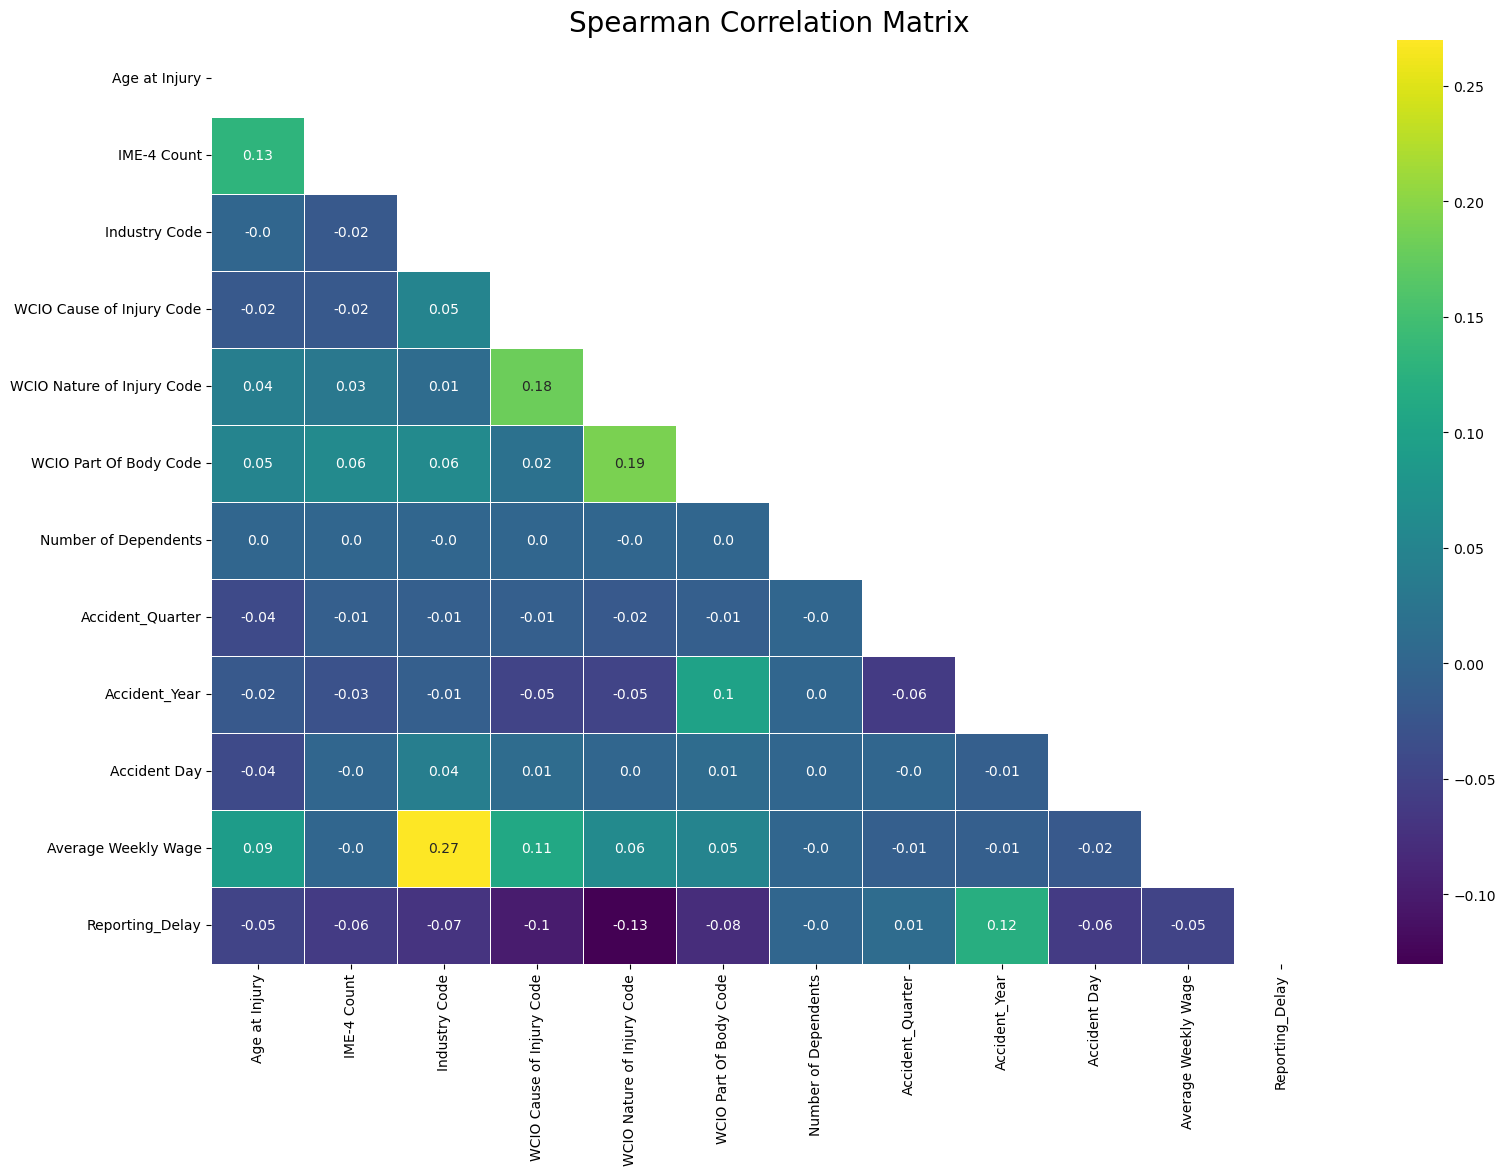

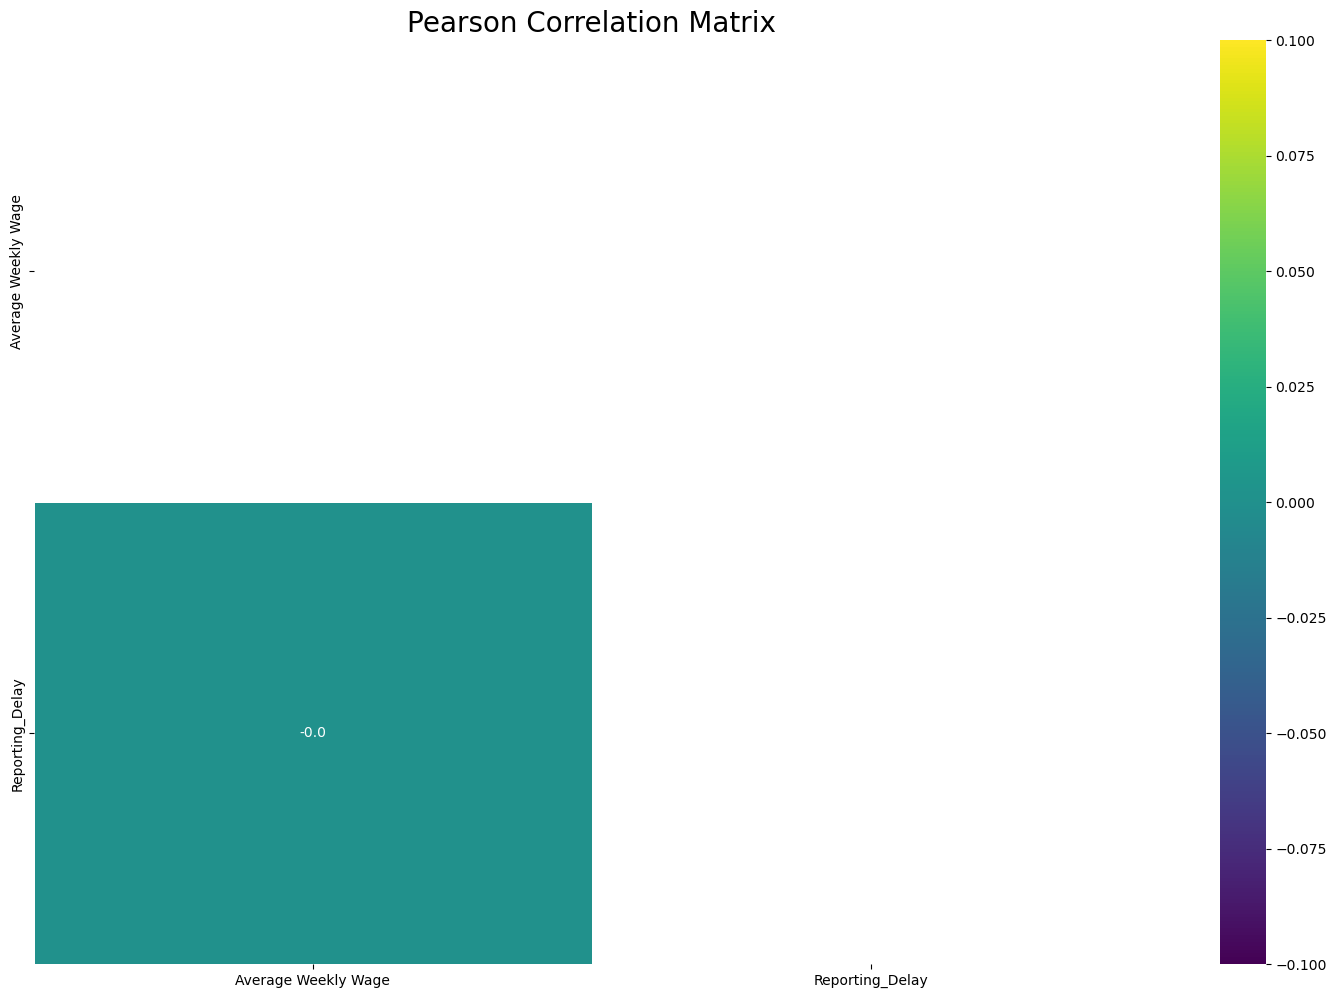

In [303]:
corr_data_numerical = X_train[scaled_columns]
corr_data_continuous = X_train[continuous_columns]
cor_spearman = corr_data_numerical.corr(method='spearman')
cor_pearson = corr_data_continuous.corr(method='pearson')

cor_heatmap(cor_spearman, 'Spearman')
cor_heatmap(cor_pearson, 'Pearson')

 > ### LASSO Regression <a class="anchor" id="sub_section_4_1_3"></a>

In [304]:
from sklearn.linear_model import LassoCV

In [307]:
# Encode the target variable
label_encoder_y = LabelEncoder()

y_train = label_encoder_y.fit_transform(y_train)
y_test = label_encoder_y.transform(y_test)

In [308]:
#fit regression
reg = LassoCV().fit(X_train[scaled_columns], y_train)
#get coefficients
coef = pd.Series(reg.coef_, index = X_train[scaled_columns].columns)
#obtain coef values
coef.sort_values()

Accident_Year                -0.068380
WCIO Cause of Injury Code    -0.045779
Reporting_Delay              -0.024495
Industry Code                -0.013510
Accident_Quarter             -0.005482
Number of Dependents         -0.000049
Average Weekly Wage           0.003186
Accident Day                  0.004891
WCIO Nature of Injury Code    0.037858
Age at Injury                 0.052919
WCIO Part Of Body Code        0.070838
IME-4 Count                   0.732247
dtype: float64

In [309]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(3,5))
    imp_coef.plot(kind = "barh", color='c')
    plt.title("Feature importance using " + name + " Model")
    plt.show()

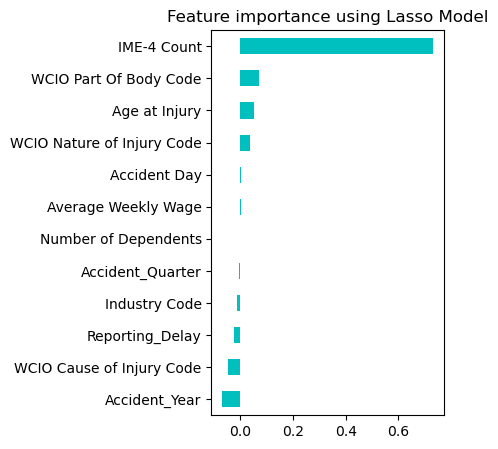

In [310]:
plot_importance(coef,'Lasso')

 > ### Recursive Feature Elimination - RFE <a class="anchor" id="sub_section_4_1_4"></a>

In [311]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [318]:
scaled_columns

['Age at Injury',
 'IME-4 Count',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Number of Dependents',
 'Accident_Quarter',
 'Accident_Year',
 'Accident Day',
 'Average Weekly Wage',
 'Reporting_Delay']

In [319]:
# Number of features
nof_list=np.arange(1,12)            
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train[scaled_columns],y_train)
    X_val_rfe = rfe.transform(X_val[scaled_columns])
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

c:\Users\xandg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\xandg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Optimum number of features: 0
Score with 0 features: 0.000000


In [320]:
#rfscv- to select 1st the number of features we should select
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 7)

In [321]:
X_rfe= rfe.fit_transform(X=X_train[scaled_columns], y=y_train)

c:\Users\xandg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\xandg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [322]:
selected_features = pd.Series(rfe.support_, index = X_train[scaled_columns].columns)
selected_features

Age at Injury                  True
IME-4 Count                    True
Industry Code                  True
WCIO Cause of Injury Code     False
WCIO Nature of Injury Code     True
WCIO Part Of Body Code        False
Number of Dependents          False
Accident_Quarter              False
Accident_Year                  True
Accident Day                  False
Average Weekly Wage            True
Reporting_Delay                True
dtype: bool

 ## 6.3. Categorical Features</b> <a class="anchor" id="section_6_3"></a>
Chi-squared and MIC for the categorical ones.

 > ### $\chi ^2$ Test for Independence <a class="anchor" id="sub_section_4_2_1"></a>

In [323]:
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest


In [324]:
categorical_columns

['Carrier_Name_Simplified',
 'County of Injury',
 'District Name',
 'Gender',
 'Medical Fee Region',
 'Carrier_District_Interaction',
 'Zip Code Region',
 'Carrier Type Merged']

In [325]:
#Chi-square test
threshold = 5 #we want to only keep the 4 most relevant features
high_score_features_chi2 = []
scores = []
names_Chi2 = []

feature_scores = SelectKBest(chi2, k=threshold).fit(X_train[categorical_columns],y_train).scores_

high_score_features = []
for score, f_name in sorted(zip(feature_scores,X_train[categorical_columns].columns), reverse=True)[:threshold]:
        high_score_features_chi2.append(f_name)
        scores.append(score)
        names_Chi2.append(f_name)

> ### Mutual Information Criterion <a class="anchor" id="sub_section_4_2_2"></a>

In [326]:
 #MIC 
threshold = 5 #we want to only keep the 4 most relevant features
high_score_features_MIC = []
scores = []
names_MIC = []
feature_scores = mutual_info_classif(X_train[categorical_columns],y_train, random_state=0)
for score, f_name in sorted(zip(feature_scores, X_train[categorical_columns].columns), reverse=True)[:threshold]:
        high_score_features_MIC.append(f_name)
        scores.append(score)
        names_MIC.append(f_name)

In [327]:
common_categorical_features = list(set(names_Chi2).intersection(list(names_MIC)))
features_selected = common_categorical_features

In [328]:
features_selected

['Medical Fee Region',
 'Carrier_Name_Simplified',
 'Carrier_District_Interaction',
 'Carrier Type Merged']

 ## 6.4. Final Features</b> <a class="anchor" id="section_6_4"></a>
Make that beautiful table, where we say in which case we reject each variable and then the final decision

# 7. Modeling <a class="anchor" id="chapter7"></a>
